# =======================================================

## 1. 코로나 이후 현황

### 1.1 분석방향성은?          
- 코로나-19는 기존의 메르스, 사스와는 다르게 장기적인 국면으로 접어들면서 사회적으로도, 경제적으로도 큰 변화를 초래[2]   
- **한국경제연구소 조사보고서에 따르면 2020년 2-3월 골목상권의 매출감소가 40%수준을 상회[1]**  
- **많은 소비자들은 음식점에 방문하지 않고, 집에서 조리한 음식을 먹으면서 외출을 자제[2]**     
- **이로 인하여 식당의 매출은 크게 감소, 배달음식의 지출은 증가하는 경향[2]**     

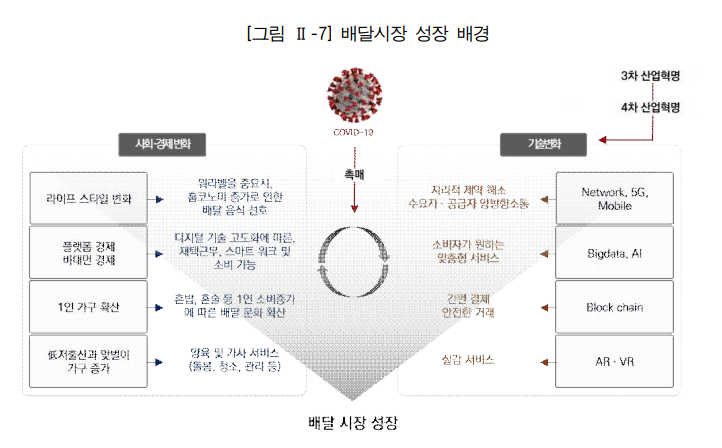


- 배달음식에 대한 지출이 증가함에 따라 배달수수료, 배달플랫폼의 독점 등과 같은 여러 문제들 또한 지속적으로 발생[3]       
- 하지만 배달서비스 문제점을 해결하기 위한 기존 연구는 대체로 팬데믹 상황 속에서 배달음식 소비자 만족도 혹은 이용행태에 대한 실증 규명에 주목     
- 때문에 소상공인 입장에서 실태를 파악할 필요성 존재

### 1.2 소상공인 실태    
- 소상공인 연합회 조사에 따르면 코로나-19 사태로 인해 10곳 중 7개 업체(70.8%)가 매출이 감소했다는 반응  

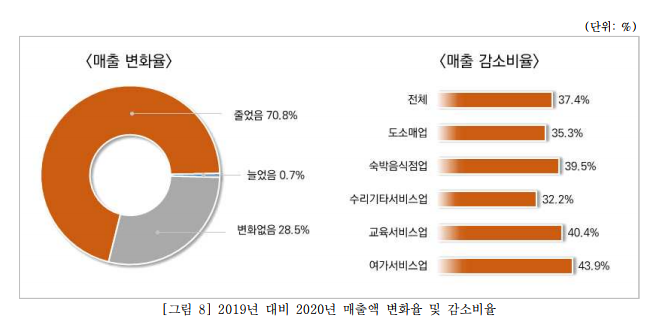

- 또한 코로나 장기화(6개월 이상) 상황에 대한 서베이에서 응답자의 72.4%가 폐업 가능성이 있거나 폐업을 고려할 것이라고 응답[5] 

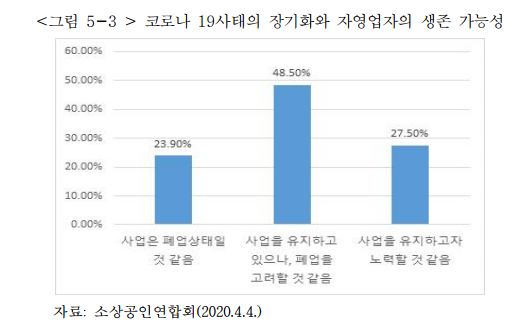

- 실제로 배달앱 생태계 내 소상공인 부담구조로 볼 때, 소상공인에게 부담이 집중되어 있음    
- 배달플랫폼과 배달대행 서비스에 각각 수수료를 지급해야 하며, 이는 배달건수마다 차감

### 사전조사 결론
- **코로나-19로 인해 배달음식 주문건수 자체는 증가하였지만, 소상공인 매출은 줄어들었으며 이로 인해 소상공인은 사업 유지에 어려움**      

# =======================================================

## 2. 데이터 확인


### 2.1 데이터 소개

본 분석에서는 다음과 같은 데이터를 활용할 예정

- [Dacon](https://dacon.io/competitions/official/235753/data)
    - KT빅데이터플랫폼
        - dlvr_call.csv
        - popl.csv 
        - StarupOrClosing_Shop_ver2.csv
        - StartupOrClosing_Region_ver2.csv
    - DS4C
        - COVID_19
        

- [KT빅데이터플랫폼](https://bdp.kt.co.kr/invoke/SOKBP0701/?srchRsltsrch=%EC%A3%BC%EB%AC%B8%EC%A7%80%EC%97%AD)
    - 주문지역 주거 특성
    
    
- 기타
    - [서울 시군구 경계](https://mkjjo.github.io/python/2019/08/18/seoul_map.html)
    - [공시지가](https://www.data.go.kr/data/15004246/fileData.do)
    
    


### 2.2 데이터 탐색

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import folium
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import os
import json
import time
from tqdm import tqdm
import warnings

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        # !apt-get update -qq
        # !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # NanumBarunGothic.ttf
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic" # NanumBarunGothic

    return font_family

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [3]:
# 최대 로우, 컬럼 설정
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [4]:
# 배달데이터 확인
df = pd.read_csv("./data/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv")
df = df.rename(columns={'SN' : '순번',
'PROCESS_DT' : '처리일시',
'DLVR_REQUST_ENTRPS_ID' : '배달요청업체ID',
'DLVR_REQUST_STTUS_VALUE' : '배달요청상태값',
'DLVR_RCEPT_ENTRPS_ID' : '배달접수업체ID',
'DLVR_STORE_ID' : '배달상점ID',
'DLVR_STORE_INDUTY_NM' : '배달상점 업종명',
'DLVR_STORE_LEGALDONG_CODE' : '배달상점법정동코드',
'DLVR_STORE_BRTC_NM' : '배달상점광역시도명',
'DLVR_STORE_SIGNGU_NM' : '배달상점시군구명',
'DLVR_STORE_LEGALDONG_NM' : '배달상점법정동명',
'DLVR_STORE_LI_NM' : '배달상점리명',
'DLVR_STORE_ADSTRD_CODE' : '배달상점행정동코드',
'DLVR_STORE_RDNMADR_CODE' : '배달상점도로명주소 코드',
'DLVR_DSTN_LEGALDONG_CODE' : '배달목적지법정동코드',
'DLVR_DSTN_BRTC_NM' : '배달목적지광역시도명',
'DLVR_DSTN_SIGNGU_NM' : '배달목적지시군구명',
'DLVR_DSTN_LEGALDONG_NM' : '배달목적지법정동명',
'DLVR_DSTN_LI_NM' : '배달목적지 리명',
'DLVR_DSTN_ADSTRD_CODE' : '배달목적지행정동코드',
'DLVR_DSTN_RDNMADR_CODE' : '배달목적지도로명주소 코드',
'DLVR_MAN_ID' : '배달자ID',
'DLVR_AMOUNT' : '배달금액',
'CALL_RLAY_FEE_AMOUNT' : '호출중계수수료금액',
'GOODS_AMOUNT' : '상품금액',
'SETLE_KND_VALUE' : '결제종류값',
'SETLE_CARD_NM' : '결제카드명',
'DLVR_RCEPT_TIME' : '배달접수시간',
'DLVR_CARALC_TIME' : '배달배차시간',
'DLVR_RECPT_TIME' : '배달수령시간',
'DLVR_COMPT_TIME' : '배달완료시간',
'DLVR_CANCL_TIME' : '배달취소시간'})

In [5]:
# 필요없는 데이터컬럼 제거
df.drop(['배달요청상태값','배달상점법정동코드',
         '배달상점법정동명','배달상점리명','배달상점행정동코드','배달상점도로명주소 코드','결제종류값','배달취소시간',
         '배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명','배달목적지법정동명', '결제카드명',
         '배달목적지 리명','배달목적지행정동코드','배달목적지도로명주소 코드'], axis=1, inplace=True)

In [6]:
# 거리데이터 --> 도로주소명
distance = pd.read_csv("./data/거리데이터2.csv")

# 거리데이터 병합
df = pd.merge(df, distance, how='left', left_on='순번', right_on='SN')

df.drop("SN", axis=1, inplace=True)
df = df.rename(columns={'DISTANCE' : '배달거리(KM)'})

## 데이터 EDA

**데이터탐색1**         
배달금액, 호출중계수수료금액, 상품금액에 상식적으로 납득하기 어려운 금액이 포함되어 있다.     
상식적으로 이해할 수 있는 값만 사용한다.    

In [7]:
print("배달비 최댓값 : ",df['배달금액'].max())
print("수수료 최댓값 : ",df['호출중계수수료금액'].max())
print("배달상품 최댓값 : ",df['상품금액'].max())

배달비 최댓값 :  105500
수수료 최댓값 :  11832
배달상품 최댓값 :  1235435


### 배달비 105,500원과 상품금액 1,235,435원은 빈정 상하는 가격이군요.        
### 이런 데이터들이 얼마나 많이 있는지 확인해보고자 BOX플롯으로 데이터를 확인하고,        
### 빈정 상하는 가격은 이상치로 판단하여 제거하겠습니다.     

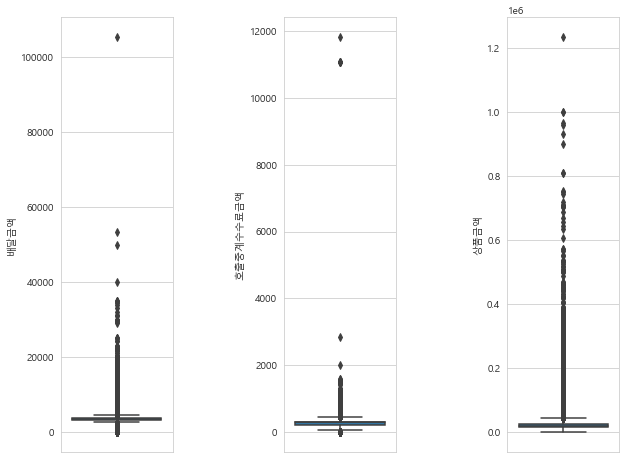

배달금액 이상치 기준 : 6500
호출중계수수료금액 이상치 기준 : 400
상품금액 이상치 기준 : 59000
상품금액 이상치 기준 : 0


In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.boxplot(y='배달금액',data=df, ax=ax[0])
sns.boxplot(y='호출중계수수료금액',data=df, ax=ax[1])
sns.boxplot(y='상품금액',data=df, ax=ax[2])
plt.show()

print("배달금액 이상치 기준 :",df['배달금액'].quantile(q=0.99, interpolation='nearest')) # 6500원 이상은 이상치
print("호출중계수수료금액 이상치 기준 :",df['호출중계수수료금액'].quantile(q=0.99, interpolation='nearest'))# 400원 이상은 이상치
print("상품금액 이상치 기준 :",df['상품금액'].quantile(q=0.99, interpolation='nearest')) # 58800원 이상은 이상치로 본다.
print("상품금액 이상치 기준 :",df['상품금액'].quantile(q=0.09, interpolation='nearest')) # 0원이 존재 ==> 쿠팡이츠 데이터 수집 오류 (10% 가량 존재)

In [9]:
# 배달금액 / 호출중계수수료금액 / 상품금액 이상치 처리
before = len(df)
df = df[df['배달금액'] <= 6500]
df = df[df['호출중계수수료금액'] <= 400]
df = df[df['상품금액'] <= 59000]
df = df[df['상품금액'] != 0] 
after = len(df)
print("이상치 제거 개수 :",before - after)

이상치 제거 개수 : 512046


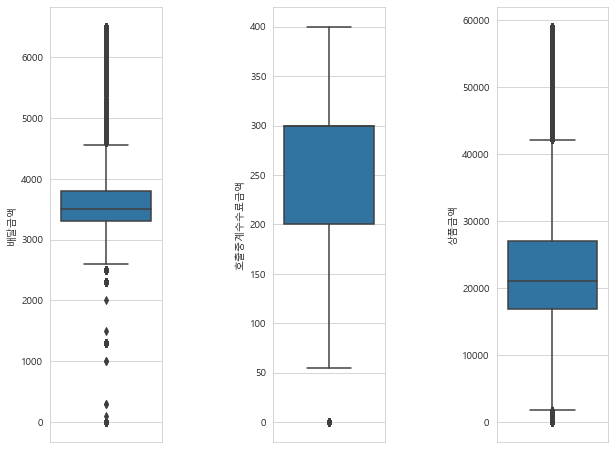

In [10]:
## 이상치 제거 후 배달 관련 금액 분포
fig, ax = plt.subplots(ncols=3, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.boxplot(y='배달금액',data=df, ax=ax[0])
sns.boxplot(y='호출중계수수료금액',data=df, ax=ax[1])
sns.boxplot(y='상품금액',data=df, ax=ax[2])
plt.show()

**데이터탐색2**        
배달 취소에 따른 배달완료시간 결측치를 제거한다.   

In [11]:
# 배달접수시간 / 배달배차시간 / 배달수령시간 / 배달완료시간 
# datetime 변환
df['배달접수시간'] = pd.to_datetime(df['배달접수시간'])
# df['배달배차시간'] = pd.to_datetime(df['배달배차시간']) # 오류 ==> 결측치 존재 // 배달취소건수로 인한 결측치
# df['배달수령시간'] = pd.to_datetime(df['배달수령시간']) # 오류 ==> 결측치 존재 // 배달취소건수로 인한 결측치
# df['배달완료시간'] = pd.to_datetime(df['배달완료시간']) # 오류 ==> 결측치 존재 // 배달취소건수로 인한 결측치

### 시간 계산을 해보고자 datetime으로 변환하는데, 결측치가 있네요.           
### 아마 배달을 중간에 취소하면서 생긴 결측치 같습니다.        
### 결측치를 제거하고 datetime으로 바꿔주겠습니다.

In [12]:
before = len(df)
df = df[df['배달완료시간'] != '\\N']
df = df[df['배달배차시간'] != '\\N']
df = df[df['배달수령시간'] != '\\N']
after = len(df)
print("결측치 개수 :",before - after)

# 
df['배달수령시간'] = pd.to_datetime(df['배달수령시간'])
df['배달배차시간'] = pd.to_datetime(df['배달배차시간'])
df['배달완료시간'] = pd.to_datetime(df['배달완료시간'])

결측치 개수 : 69783


**데이터탐색3**     
배달시간을 통한 파생변수를 생성한다.    
라이더배치시간, 픽업이동시간, 순수배달시간, 총배달시간을 생성하며,    
총배달시간을 계산가능한 형태 데이터로 파생변수를 하나 더 생성한다.

In [13]:
# 배달시간 컬럼 생성
df['라이더배치시간'] = df['배달배차시간'] - df['배달접수시간']
df['픽업이동시간'] = df['배달수령시간'] - df['배달배차시간']
df['순수배달시간'] = df['배달완료시간'] - df['배달수령시간']
df['총배달시간'] = df['배달완료시간'] - df['배달접수시간']

# 총배달시간 데이터 타입을 고려한 새로운 파생변수
deli_time = df['총배달시간'].to_list()
new_list = []
for time in tqdm(deli_time) :
    new_list.append(time.total_seconds() / 60)
df['배달시간계산'] = new_list

# 년월에 따른 구분을 위한 파생변수
df['처리일시'] = pd.to_datetime(df['처리일시'])
df['년월'] = df['처리일시'].dt.strftime('%Y-%m')

# 파생변수 이용을 위한 리스트화
date_list = df['년월'].unique()

100%|███████████████████████████████████████████████████████████████████| 3714442/3714442 [00:02<00:00, 1812696.89it/s]


**데이터탐색5**    
요일별 배달건수 확인을 위한 파생변수를 생성한다.

In [14]:
# 요일별 구분을 위한 요일 추가
df['처리일시'] = df['처리일시'].astype(str)
check_list = df['처리일시'].to_list()

dayofweek_list = []

for date in tqdm(check_list):
    day_name = pd.Timestamp(date).dayofweek
    if day_name == 0 :
        dayofweek_list.append("월요일")
    elif day_name == 1:
        dayofweek_list.append("화요일")
    elif day_name == 2:
        dayofweek_list.append("수요일")
    elif day_name == 3:
        dayofweek_list.append("목요일")
    elif day_name == 4:
        dayofweek_list.append("금요일")
    elif day_name == 5:
        dayofweek_list.append("토요일")
    else :
        dayofweek_list.append("일요일")
        
df['요일'] = dayofweek_list

100%|████████████████████████████████████████████████████████████████████| 3714442/3714442 [00:13<00:00, 276871.41it/s]


**데이터탐색6**     
주문시각에 따른 식사 분류 파생변수를 생성한다.          
이때 주요 배달 시간을 점심, 저녁, 야식으로 판단하며, 그 외 시간은 기타로 분류한다.

In [15]:
# 주문시각에 따른 분류 
df['배달접수시간'] = df['배달접수시간'].astype(str)

hour_list = []
for x in tqdm(range(len(df))):
    hour_list.append(df['배달접수시간'].iloc[x][11:13]) # space 바 포함

df['배달 시간대'] = hour_list

etc = ['00','01','02','03','04','05','06','07','08','09','10']
lunch = ['11','12','13','14','15','16']
dinner = ['17','18','19','20'] 

hour_ctg_list = []
for hour in tqdm(hour_list) :
    if hour in etc :
        hour_ctg_list.append("기타")
    elif hour in lunch :
        hour_ctg_list.append("점심")
    elif hour in dinner :
        hour_ctg_list.append("저녁")
    else :
        hour_ctg_list.append("야식")
        
df['주문시각분류'] = hour_ctg_list

# 배달완료시각 및 주문접수시각 드롭
df = df.drop(['배달접수시간','배달배차시간','배달수령시간','배달완료시간'], axis=1)

100%|███████████████████████████████████████████████████████████████████| 3714442/3714442 [00:02<00:00, 1411253.10it/s]


**데이터탐색4**         
현재 배달데이터의 시간범위는 2019.12.01 ~ 2020.05.31 이다.        
대한민국 코로나 확진자 발생 시기는 1월 20일이며, 신천지 사태로 인한 대확산은 2월 18일이다.        
소상공인 연합회 조사에 따르면 코로나 발생 이후 가장 영향력이 컸었던 사건은 신천지 사태이다.             
때문에 신천지로 인한 대확산 사태의 영향력을 파악하고, 그 영향력을 고려하여 코로나 전후를 구분한다.      

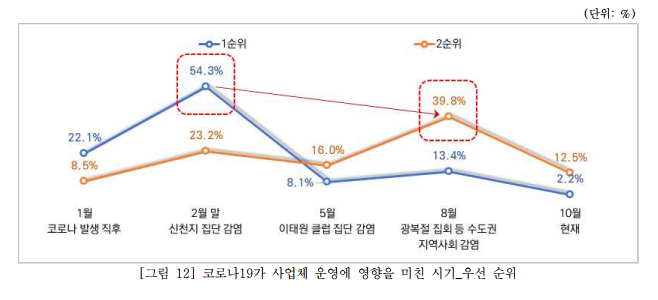

<Figure size 1440x720 with 0 Axes>

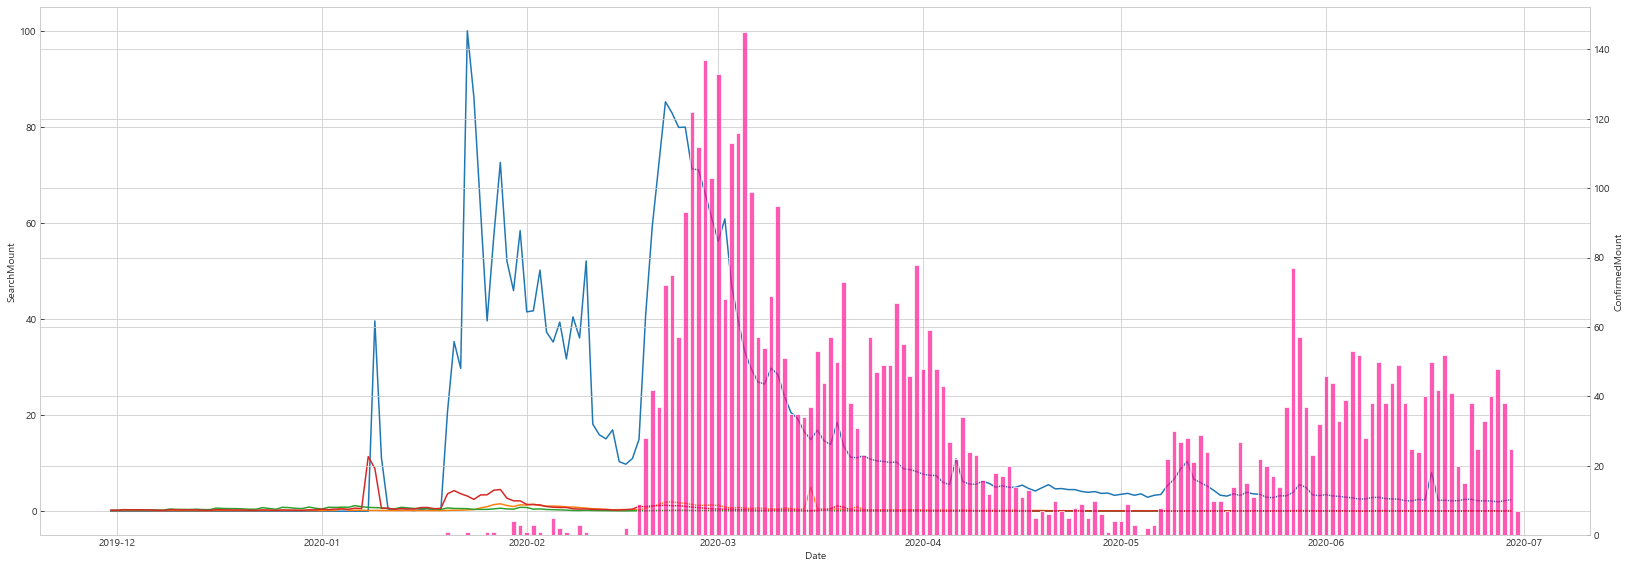

In [16]:
### 서치트렌드 & 코로나 확진자 수 시각화 그래프
searchtrend = pd.read_csv('./data/covid_19_dataset/SearchTrend.csv')
searchtrend['date'] = searchtrend['date'].astype('str')
searchtrend['date'] = pd.to_datetime(searchtrend['date'])
filtered_df =searchtrend.loc[searchtrend["date"].between('2019-11-30', '2020-06-29')]
filtered_searchtrend = pd.DataFrame(filtered_df)

patientinfo = pd.read_csv('./data/covid_19_dataset/patientinfo.csv')
covid_confirmed = pd.DataFrame(patientinfo['confirmed_date'].value_counts(),index=None)
covid_confirmed.reset_index(inplace=True)
covid_confirmed.sort_values(by='index')
covid_confirmed['index'] = pd.to_datetime(covid_confirmed['index'])

plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots()
x = 2000 / fig.dpi  # 가로 길이 (320 pixel)
y = 700 / fig.dpi  # 세로 길이 (240 pixel)
fig.set_figwidth(x)
fig.set_figheight(y)

ax1.plot(filtered_searchtrend['date'],filtered_searchtrend['coronavirus'], label='coronavirus') ## 선그래프 생성
ax1.plot(filtered_searchtrend['date'],filtered_searchtrend['cold'], label='cold')
ax1.plot(filtered_searchtrend['date'],filtered_searchtrend['flu'], label='flu')
ax1.plot(filtered_searchtrend['date'],filtered_searchtrend['pneumonia'], label='pneumonia')
ax1.set_xlabel('Date')
ax1.set_ylabel('SearchMount')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(covid_confirmed['index'], covid_confirmed['confirmed_date'], color='deeppink', alpha=0.7, width=0.7)
ax2.set_ylabel('ConfirmedMount')
ax2.tick_params(axis='y', direction='in')
plt.show()

### SearchTrend를 보니 코로나 확진자가 발생한 시기와 신천지 시기에 급격히 올라가는 것이 파악됐습니다.
### 그리고 확진자 그래프를 그려보니 신천지 사태 이후로 확진자가 폭증하는 것을 알 수 있습니다.
### 때문에 신천지 사태 이후로 코로나 전 후로 구분하는 것이 영향력 판단에 의미가 있을 것 같습니다.

In [17]:
# # 2020년 2~3월 : 신천지 (2월 18일 발생 시작 - 4월 29일 종료)
# # 4개로 나눠서 진행
# # 2019년 ~ 2020년 2월 17일까지
query1 = "처리일시 < '2020-02-18'"
date1 = df.query(query1)
date1['코로나'] = "전"

# # 2020년 2월 18일 ~ 
query2 = "처리일시 > '2020-02-17'"
date2 = df.query(query2)
date2['코로나'] = "후"

# 병합
df = pd.concat([date1, date2])

**데이터탐색20**         
평균일일배달건수를 확인하여 코로나 영향을 파악한다.   

In [18]:
before_corona = df[df['코로나'] == '전']
after_corona = df[df['코로나'] == '후']

print("코로나 전 평균일일배달건수 :",round(len(before_corona) / before_corona['처리일시'].nunique()))
print("코로나 후 평균일일배달건수 :",round(len(after_corona) / after_corona['처리일시'].nunique()))

코로나 전 평균일일배달건수 : 18080
코로나 후 평균일일배달건수 : 22195


### 역시 코로나 전보다 일일배달건수가 늘어나는 모습을 보입니다.     
### 하지만 일일배달건수가 코로나에 영향을 받은 것인지, 
### 그냥 배달음식주문 추세가 많이 증가한 것인지는 알기 어렵습니다.       
### 때문에 코로나 확진자 그래프와 함께 일일배달건수를 시각화해보겠습니다.        

**데이터탐색21**         
일일 코로나 확진자 발생건수에 따라 일일배달건수가 변화하는지 살펴본다. 

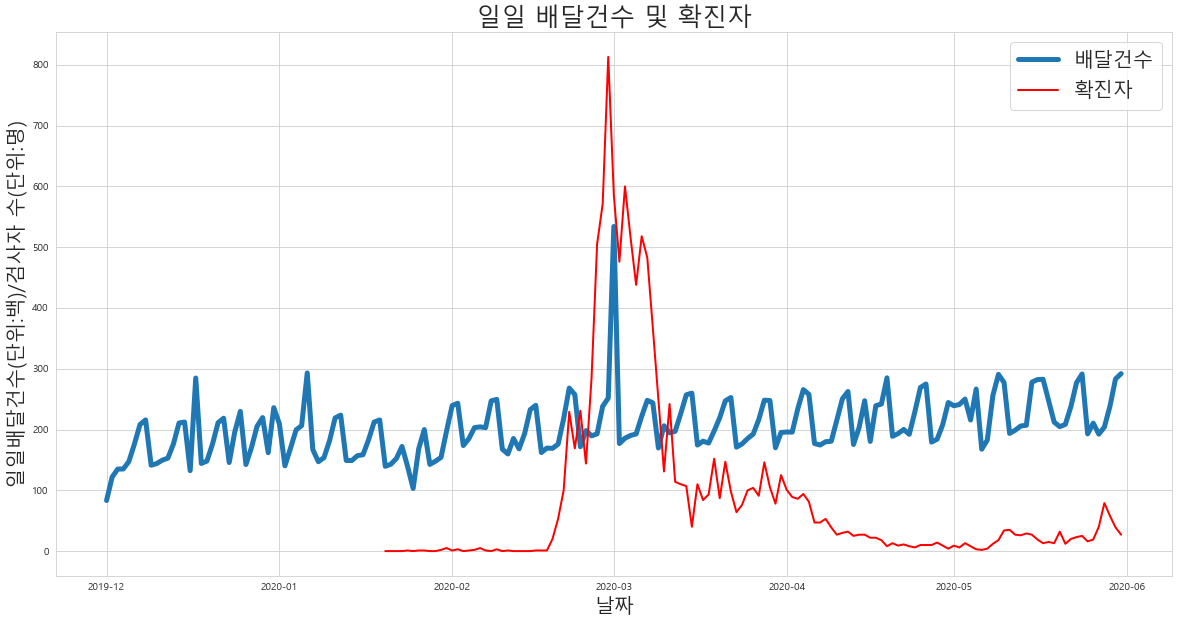

In [19]:
## 코로나 일일 확진자 수

covid_df = pd.read_csv("./data/covid_19_dataset/Time.csv")
covid_df['date'] = pd.to_datetime(covid_df['date'])
corona_data = covid_df[covid_df['date'] < '2020-06-01']
corona_data.drop("time", axis=1, inplace=True)

per_day_test = [0]
per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(corona_data)-1) :
    per_day_test.append(corona_data['test'].iloc[x+1] - corona_data['test'].iloc[x])
    per_day_confirmed.append(corona_data['confirmed'].iloc[x+1] - corona_data['confirmed'].iloc[x])
    per_day_released.append(corona_data['released'].iloc[x+1] - corona_data['released'].iloc[x])
    per_day_deceased.append(corona_data['deceased'].iloc[x+1] - corona_data['deceased'].iloc[x])

corona_data['per_day_test'] = per_day_test
corona_data['per_day_confirmed'] = per_day_confirmed
corona_data['per_day_released'] = per_day_released
corona_data['per_day_deceased'] = per_day_deceased

per_day_df = pd.DataFrame(df.groupby("처리일시", as_index=False).size())
per_day_df['처리일시'] = pd.to_datetime(per_day_df['처리일시'])


plt.figure(figsize=(20,10))
sns.lineplot(x=per_day_df['처리일시'], y=per_day_df['size']/100, linewidth=5) # 단위 : 백 건
sns.lineplot(x='date', y='per_day_confirmed', data=corona_data, linewidth=2, color='red')
plt.title("일일 배달건수 및 확진자", fontsize=25)
plt.xlabel("날짜", fontsize=20)
plt.ylabel("일일배달건수(단위:백)/검사자 수(단위:명)", fontsize=20)
plt.legend(labels=('배달건수', '확진자'), fontsize=20)
plt.show()

### 일일배달건수를 시각화하였을 때,확진자 폭증시기와 배달건수 증가 시기가 어느 정도 일치하는 것으로 보입니다.       
### 2~3일 정도의 시간차는 미디어 매체로 인한 파급효과 전달시간으로 보입니다.              
### 다만 기억을 더듬어보면, 신천지 사태 때에는 대구에서 확진자가 급증하였고 
### 서울은 그 영향이 미미했던 것으로 기억납니다. 
### 지역별로 확진자를 파악하여 그 영향력을 보는 것도 좋을 것 같습니다. 

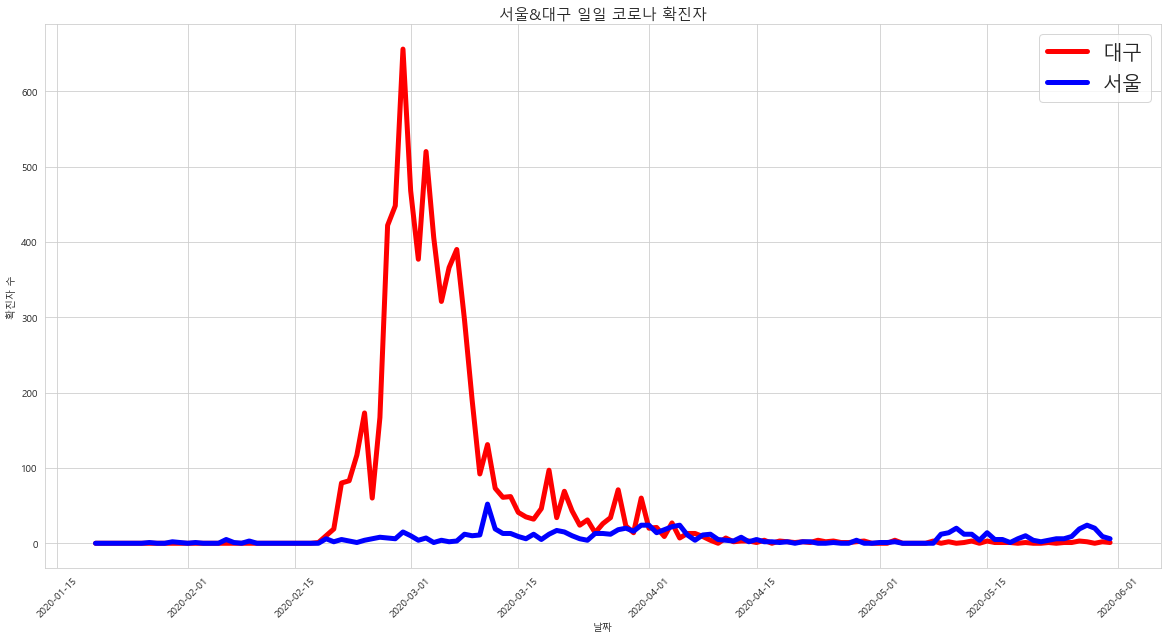

In [20]:
# 대구와 서울 비교

# 시간 및 지역별 감염자 정보
covid_df2 = pd.read_csv("./data/covid_19_dataset/TimeProvince.csv")
covid_df2.drop("time", axis=1, inplace=True)
covid_df2['date'] = pd.to_datetime(covid_df2['date'])
covid_df2 = covid_df2[covid_df2['date'] < '2020-06-01']


# 지역별 구분은 test 검사자가 없음
daegu = covid_df2[covid_df2['province']=='Daegu']


per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(daegu)-1) :

    per_day_confirmed.append(daegu['confirmed'].iloc[x+1] - daegu['confirmed'].iloc[x])
    per_day_released.append(daegu['released'].iloc[x+1] - daegu['released'].iloc[x])
    per_day_deceased.append(daegu['deceased'].iloc[x+1] - daegu['deceased'].iloc[x])


daegu['per_day_confirmed'] = per_day_confirmed
daegu['per_day_released'] = per_day_released
daegu['per_day_deceased'] = per_day_deceased


seoul = covid_df2[covid_df2['province']=='Seoul']


per_day_confirmed = [0]
per_day_released = [0]
per_day_deceased = [0]

for x in range(len(seoul)-1) :
    per_day_confirmed.append(seoul['confirmed'].iloc[x+1] - seoul['confirmed'].iloc[x])
    per_day_released.append(seoul['released'].iloc[x+1] - seoul['released'].iloc[x])
    per_day_deceased.append(seoul['deceased'].iloc[x+1] - seoul['deceased'].iloc[x])

seoul['per_day_confirmed'] = per_day_confirmed
seoul['per_day_released'] = per_day_released
seoul['per_day_deceased'] = per_day_deceased

plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='per_day_confirmed', data=daegu, linewidth=5, color='red')
sns.lineplot(x='date', y='per_day_confirmed', data=seoul, linewidth=5, color='blue')
plt.title("서울&대구 일일 코로나 확진자", fontsize=15)
plt.xlabel("날짜", fontsize=10)
plt.ylabel("확진자 수", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(labels=('대구', '서울'), fontsize=20)
plt.show()

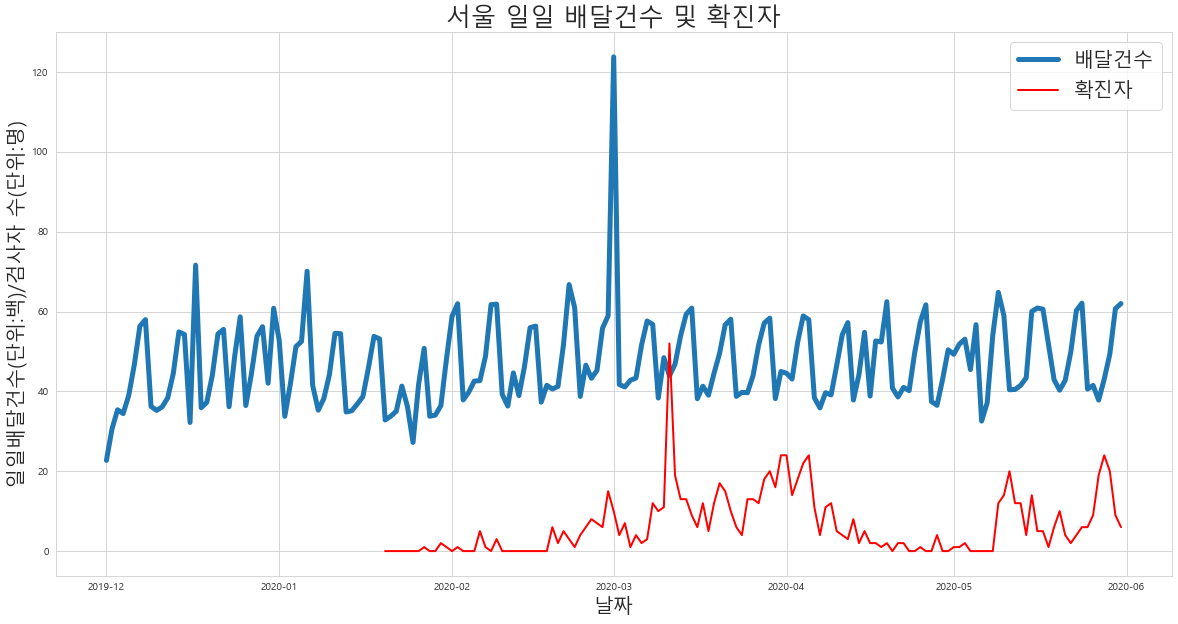

In [21]:
######## 서울 데이터만 한정하여 배달건수와 코로나 확진자를 비교해보자.

seoul_df = df[df['배달상점광역시도명']=='서울특별시']
seoul_per_day_df = pd.DataFrame(seoul_df.groupby("처리일시", as_index=False).size())
seoul_per_day_df['처리일시'] = pd.to_datetime(seoul_per_day_df['처리일시'])

plt.figure(figsize=(20,10))
sns.lineplot(x=per_day_df['처리일시'], y=seoul_per_day_df['size']/100, linewidth=5) # 단위 : 백 건
sns.lineplot(x='date', y='per_day_confirmed', data=seoul, linewidth=2, color='red')
plt.title("서울 일일 배달건수 및 확진자", fontsize=25)
plt.xlabel("날짜", fontsize=20)
plt.ylabel("일일배달건수(단위:백)/검사자 수(단위:명)", fontsize=20)
plt.legend(labels=('배달건수', '확진자'), fontsize=20)
plt.show()

### 서울데이터로만 그래프를 그려볼 때, 큰 상관관계는 없어보입니다.          
### 대체로 배달건수와 확진자가 대구 신천지 사태에 영향을 받았다라는 인상을 받았습니다.        
### 미디어를 통한 빠른 정보전달은 먼저 배달음식 증가라는 결과가 나타났으며,        
### 이후 신천지발 감염을 통해 서울에서도 확진자가 증가한 것으로 보입니다. 

**데이터탐색12**       
전체 배달건수와 평균배달시간을 확인한다.       
이를 통해 배달건수와 평균배달시간의 관계를 파악한다.

5%대 배달 시간 : 0 days 00:10:52
99%대 배달 시간 0 days 01:03:26


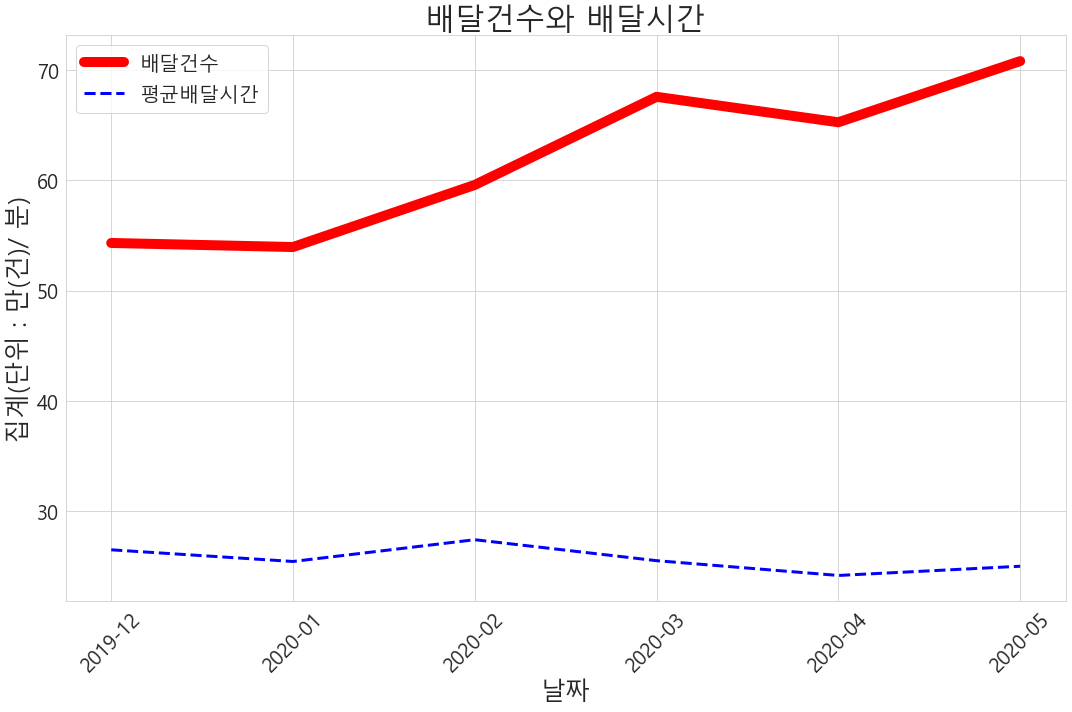

In [22]:
# 시간별 배달건수
time_df = df.groupby("년월", as_index=False).size()
time_df = pd.DataFrame(time_df)


# 시간흐름에 따른 배달시간 평균 변화
# 배달시간 범위 확인
print("5%대 배달 시간 :",df['총배달시간'].quantile(q=0.05, interpolation='nearest'))
print("99%대 배달 시간",df['총배달시간'].quantile(q=0.99, interpolation='nearest'))


# 상식선에서 생각할 때 총배달시간이 10분 이내인 것은 이해할 수 없다.
# 총배달시간이 1시간 넘게 걸리는 것은... 용서할 수 없다!!!
# 버릴지 말지 고민 중 ==> 우선 카테고리별로 보자 / 카페 디저트는 빠르게 배달할 수도 있으니까


delivery_time_df = df[['년월', '배달상점 업종명', '배달상점광역시도명','배달상점시군구명', '배달시간계산']]
time_check = delivery_time_df.groupby('년월', as_index=False).mean()

# 전체 배달건에 따른 시각화
plt.figure(figsize=(15,10))
sns.lineplot(x='년월', y=time_df['size']/10000,data=time_df, linewidth=10, color='red') # 전체 배달건수
sns.lineplot(x='년월', y='배달시간계산',data=time_check, color='blue', linewidth=3, linestyle='--') # 평균배달시간
plt.title('배달건수와 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 만(건)/ 분)", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.legend(labels=('배달건수', '평균배달시간'), fontsize=20)
plt.show()

# 시간 흐름에 따라 배달건수가 증가하고 있으며, 코로나가 발생하기 시작한 1월과 신천지 사태가 발발한 2월에 급격하게 늘어나고 있다.
# 그러나 평균 배달시간에는 변화가 없...

### 배달건수가 증가하는 것에 비해 평균배달시간의 변화는 없습니다.       
### 아마 라이더와 배달건수가 동시에 증가함에 따라 그 영향이 서로 상쇄되지 않았을까 싶습니다.

**데이터탐색13**       
카테고리별 평균배달시간을 확인한다.  

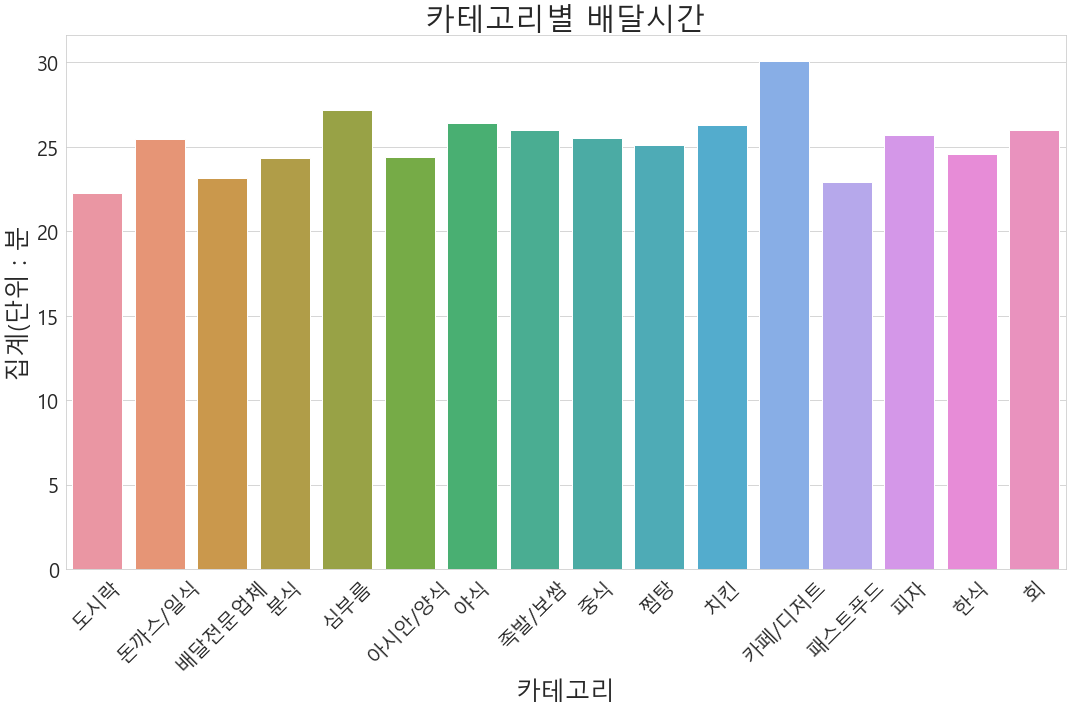

In [23]:
# 카테고리별 평균배달시간 확인
category_time_df = delivery_time_df.groupby(['배달상점 업종명'], as_index=False).mean()
category_time_df

plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y=category_time_df['배달시간계산'],data=category_time_df)
plt.title('카테고리별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


### 카페 디저트가 가장 긴 배달시간을 갖는군요.         
### 보통 카페 디저트는 빠르게 준비되지 않을까요?           
### 왜 가장 많이 걸리는지 이해할 수가 없지만, 우선은 계속해서 데이터를 살펴보고자 합니다. 

**데이터탐색14**        
행정구별 평균배달시간을 확인한다. 

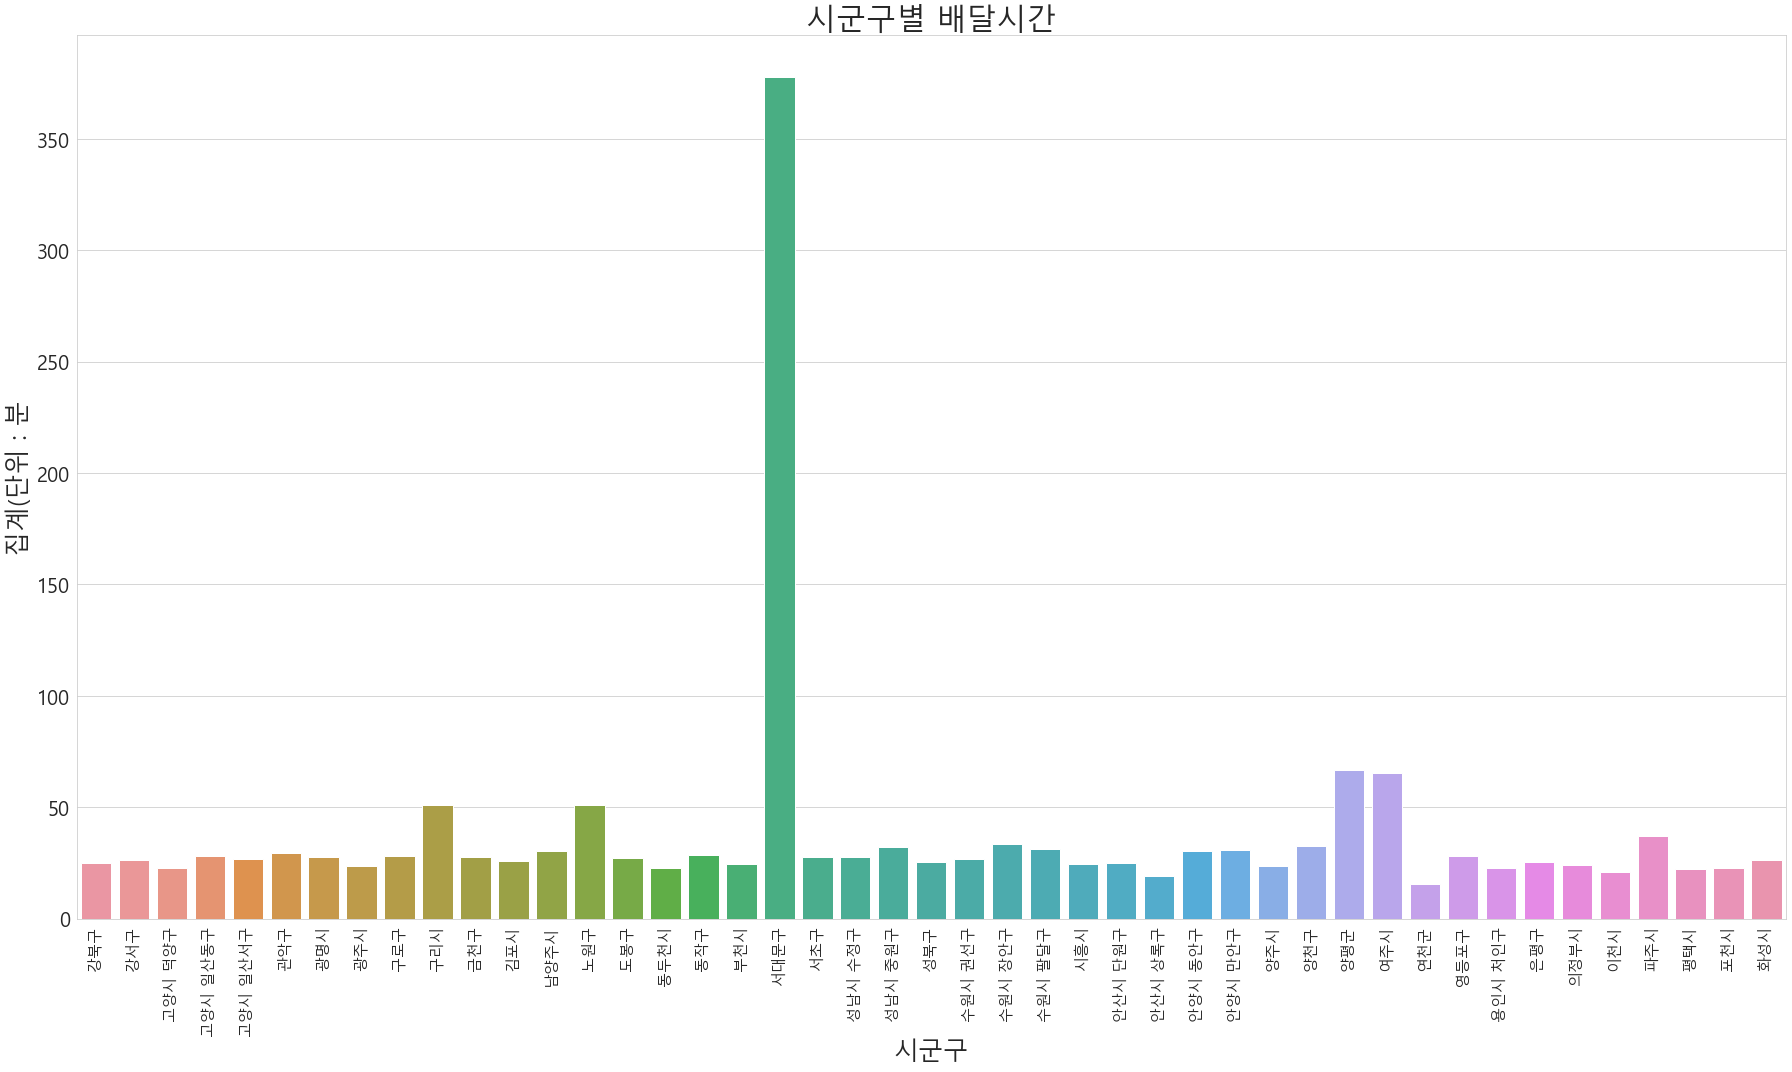

In [24]:
# 행정구별 구분
hangjeong = delivery_time_df.groupby('배달상점시군구명', as_index=False).mean()

plt.figure(figsize=(25,15))
sns.barplot(x='배달상점시군구명', y=hangjeong['배달시간계산'],data=hangjeong)
plt.title('시군구별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("시군구", fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

### 서대문구는 배달을 시키면 6시간을 기다려야 하는 기이한 데이터를 가지고 있습니다.          
### 이건 뭐 선 넘은 정도가 아니라, 직무유기 수준 아닌가요?          
### 실제로 6시간을 기다려야 한다면 짜장면은 떡이 되고, 피자는 차가운 빈대떡이 되는 기적을 볼 수 있겠군요.       
### 아마 이상치인 듯 싶습니다.      
### 그래도 좀 넓게 보기 위해 평균 70분이 넘는 친구들만 가져와서 보겠습니다.         

In [25]:
# 이상치 찾아내기
over_time = hangjeong[hangjeong['배달시간계산'] > 70]
print(over_time['배달상점시군구명'].unique())

query1 = "배달상점시군구명 in ('구리시', '노원구', '서대문구', '양평군', '여주시')"
check_over_time = df.query(query1)

# 특정 배달요청업체ID 값들을 갖는 놈이 배달시간이 길다
# 해당 아이디를 제거하고 평균배달시간과 카테고리별 평균배달시간 시각화 진행

check_over_time = check_over_time[check_over_time['배달시간계산'] > 70]

print("이상치 지역 : ",check_over_time['배달요청업체ID'].unique())
print("이상치 배달요청업체 :",check_over_time['배달요청업체ID'].value_counts())

['서대문구']
이상치 지역 :  ['C000040' 'C000032' 'C000039' 'C000303']
이상치 배달요청업체 : C000032    2676
C000040     948
C000039     638
C000303      26
Name: 배달요청업체ID, dtype: int64


### 데이터를 보니 특정 배달요청업체들에게서 이상치가 계속 반복해서 나오는군요.          
### 바로 던져버리겠습니다.      
### 그러면 이상치를 삭제한 뒤 그래프를 다시 그려봐야겠습니다.   

In [26]:
# 해당 이상치 모두 삭제
before = len(df)
df = df[(df['배달요청업체ID'] != 'C000040') & (df['배달요청업체ID'] != 'C000032') & (df['배달요청업체ID'] != 'C000039') & (df['배달요청업체ID'] != 'C000303')]
after = len(df)
print("제거 이상치 수 :",before - after)

제거 이상치 수 : 198887


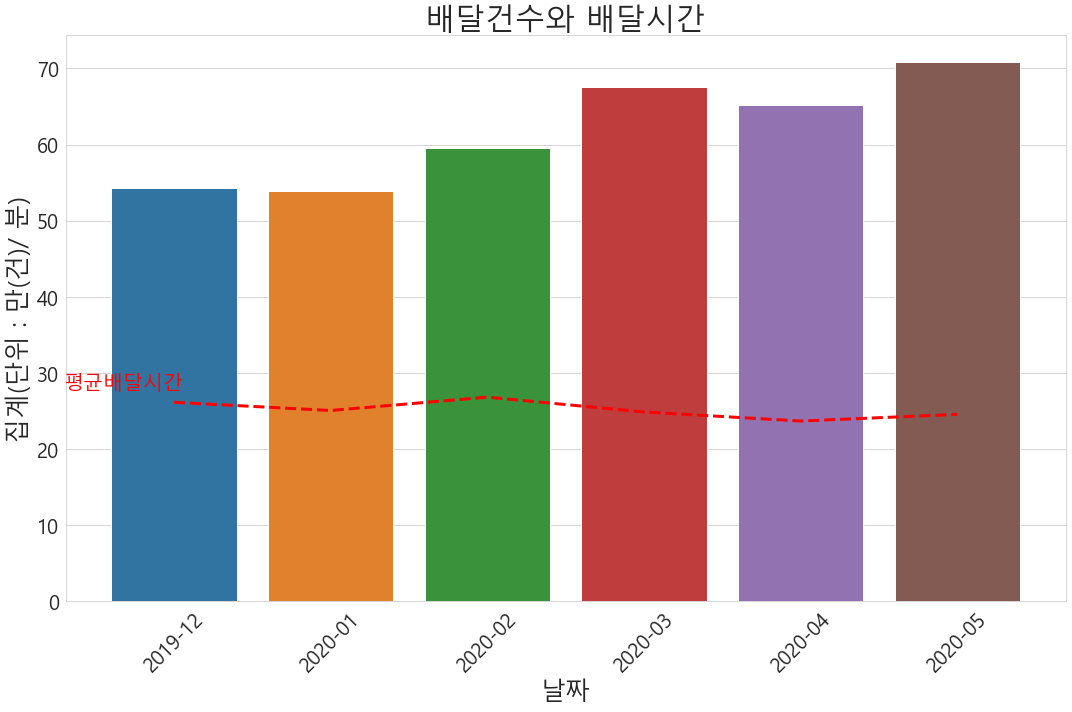

In [27]:
## 배달시간관련 시각화 다시 진행

## 1. 평균배달소요시간 다시!!
delivery_time_df = df[['년월', '배달상점 업종명', '배달상점광역시도명', '배달상점시군구명', '배달시간계산']]
time_check = delivery_time_df.groupby('년월', as_index=False).mean()

# 전체 배달건에 따른 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='년월', y=time_df['size']/10000,data=time_df)
sns.lineplot(x='년월', y='배달시간계산',data=time_check, color='red', linewidth=3, linestyle='--')
plt.title('배달건수와 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 만(건)/ 분)", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.text(-0.7,28,"평균배달시간", fontsize=20, color="red")
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

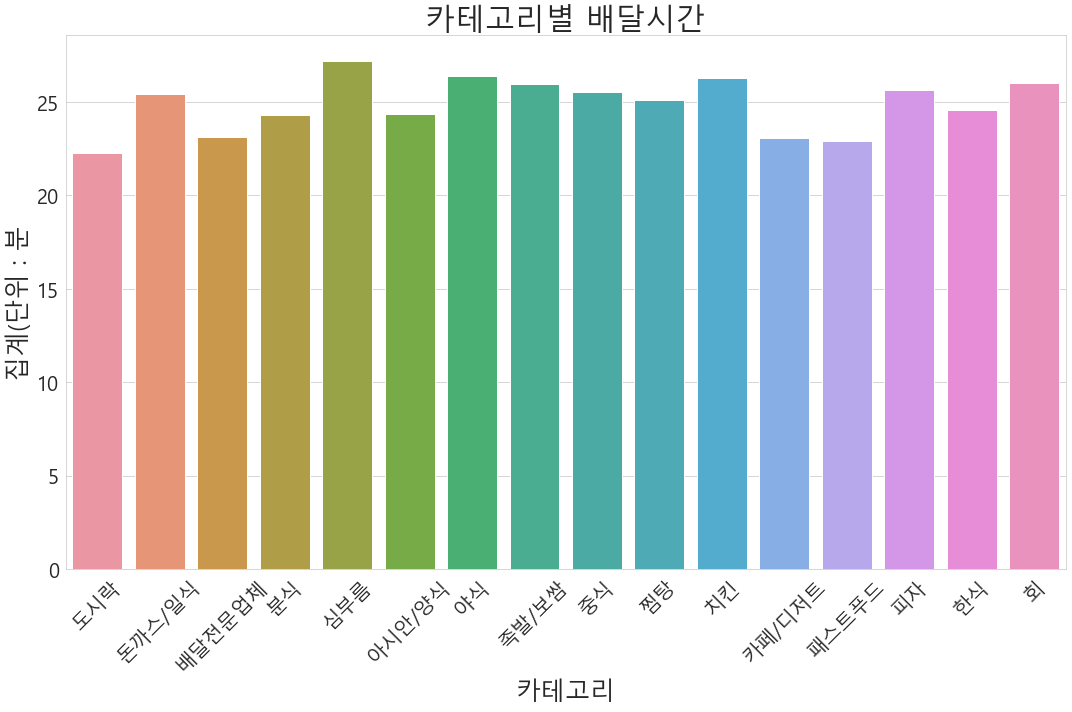

In [28]:
## 2. 카테고리별 평균배달시간 다시!!!
category_time_df = delivery_time_df.groupby(['배달상점 업종명'], as_index=False).mean()
category_time_df

plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y=category_time_df['배달시간계산'],data=category_time_df)
plt.title('카테고리별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


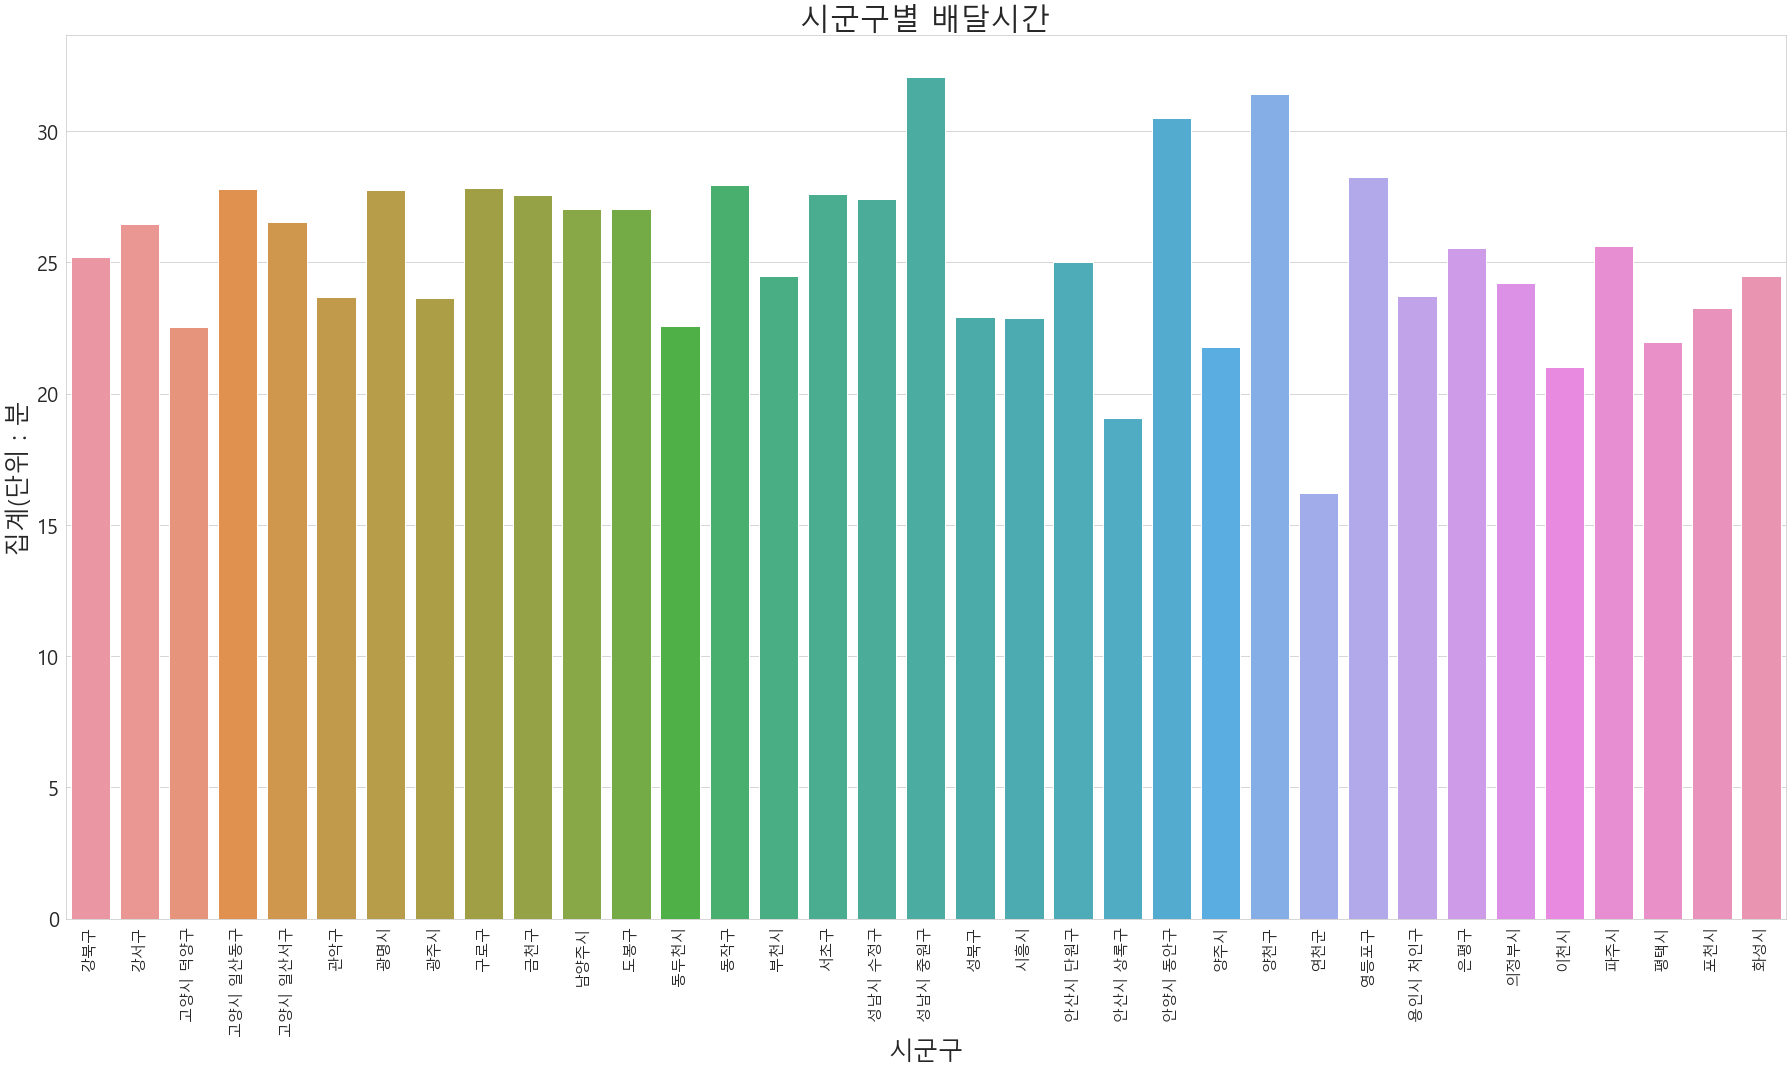

In [29]:
## 3. 행정구별 평균배달시간 다시!!!
# 행정구별 구분
hangjeong = delivery_time_df.groupby('배달상점시군구명', as_index=False).mean()

plt.figure(figsize=(25,15))
sns.barplot(x='배달상점시군구명', y=hangjeong['배달시간계산'],data=hangjeong)
plt.title('시군구별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("시군구", fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

### 카페 디저트 항목에서 크게 배달시간이 크게 줄었네요.           
### 이전 그래프는 이상치로 인해 왜곡된 것으로 보입니다.    
### 배달시간은 대체로 30분대 전으로 형성됩니다.          
### 서대문구는 전체가 이상치였던 것 같습니다.       
### 서대문구 담당 배달요청업체 분들... 잊지 않겠습니다.

**데이터탐색17**       
배달시간과 매출량의 관계를 파악한다. 

In [30]:
# 상관관계 사전 데이터 준비
shop_id1 = df.groupby('배달상점ID', as_index=False).size()
shop_id1 = pd.DataFrame(shop_id1)

shop_id2 = df.groupby('배달상점ID', as_index=False).mean()
shop_id2 = shop_id2[['배달상점ID', '배달시간계산']]

shop_id = pd.merge(shop_id1, shop_id2, how='inner', on='배달상점ID')
shop_id = shop_id.set_index('배달상점ID')
corr_df = shop_id.corr()
s = corr_df.unstack()

corr_df1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_df1.style.background_gradient(cmap='viridis')

,,corr
size,배달시간계산,-0.158878
배달시간계산,size,-0.158878


### 너무나 당연하게 생각되는 결과입니다만, 배달시간이 많이 걸릴수록 배달건수가 줄어드는 상관관계를 보였습니다.     
### 배달시간을 줄인다면 매출건수를 늘릴 수 있을 것 같습니다. 

**데이터탐색18**         
라이더 배치 속도의 변화를 통해 O2O 서비스 품질 변화를 확인한다.    

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.58it/s]


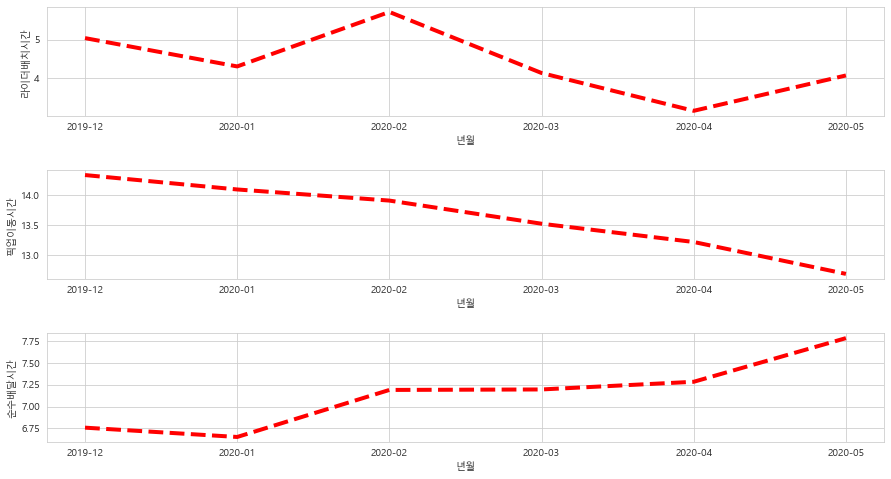

In [31]:
date_list = df['년월'].unique()

rider_check = []
pickup_check = []
delivery_check = []

for zz in tqdm(date_list) :
    check = df[df['년월']==zz]
    rider_check.append(check['라이더배치시간'].mean().total_seconds() / 60)
    pickup_check.append(check['픽업이동시간'].mean().total_seconds() / 60)
    delivery_check.append(check['순수배달시간'].mean().total_seconds() / 60)

time_check = pd.DataFrame([date_list, rider_check, pickup_check, delivery_check]).T
time_check.columns = ['년월', '라이더배치시간', '픽업이동시간', '순수배달시간']


fig, ax = plt.subplots(nrows=3, figsize=(15,8))
plt.subplots_adjust(wspace=1, hspace=0.5)
sns.lineplot(x= "년월", y='라이더배치시간', color='red', linewidth=4, linestyle="--", data=time_check, ax=ax[0])
sns.lineplot(x= "년월", y='픽업이동시간', color='red', linewidth=4, linestyle="--", data=time_check,  ax=ax[1])
sns.lineplot(x= "년월", y='순수배달시간', color='red', linewidth=4, linestyle="--", data=time_check,  ax=ax[2])
plt.show()

### 픽업이동시간과 순수배달시간에서 반대되는 결과가 나왔습니다.       
### 라이더가 음식을 가지러 가는 시간은 줄어드는 반면, 픽업 후 배달 시간은 늘어나는군요.       
### 각 단계별 배달시간 변화에도 평균배달시간이 변화가 크지 않은 것은 그 변화 범위가 적기 때문으로 보입니다.

### 그래도 뭔가 해결방안의 실마리가 보이는 기분입니다.       
### 위에서 배달시간과 매출건수가 음의 상관관계를 보이는 것을 확인했습니다.        
### 배달시간이 늘어나는 것은 아마 배달거리가 늘어난 것으로 생각되는데,           
### 그렇다면 배달거리를 줄이고 1인가구의 진입을 쉽게 만든다면 매출이 늘어나지 않을까요?!          
### 이를 위해 건수별 배달거리를 계산한 뒤, 실제로 배달거리가 늘어났는지 확인해보는 작업을 진행하겠습니다.    

**데이터탐색19**         
배달건수와 라이더, 순수배달시간과 배달거리를 계산한다.   

In [32]:
rider_list = []
for x in tqdm(date_list) :
    check = df[df['년월']==x]
    rider_list.append(check['배달자ID'].nunique())

delivery_count = []
for x in tqdm(date_list) :
    check = df[df['년월']==x]
    delivery_count.append(len(check))

for x in range(5) :
    print(x+1,"월의 배달건수 변화율 :",(round(delivery_count[x+1] / delivery_count[x],2)*100)-100, "%") 
    print(x+1,"월의 라이더 수 변화율 : ",(round(rider_list[x+1] / rider_list[x],2)*100)-100, "%")
    print()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.73it/s]

1 월의 배달건수 변화율 : -1.0 %
1 월의 라이더 수 변화율 :  8.0 %

2 월의 배달건수 변화율 : 9.000000000000014 %
2 월의 라이더 수 변화율 :  9.000000000000014 %

3 월의 배달건수 변화율 : 13.999999999999986 %
3 월의 라이더 수 변화율 :  8.0 %

4 월의 배달건수 변화율 : -3.0 %
4 월의 라이더 수 변화율 :  2.0 %

5 월의 배달건수 변화율 : 10.000000000000014 %
5 월의 라이더 수 변화율 :  6.0 %



In [33]:
## 거리가 늘어났는지를 파악한다.
print(df.groupby("년월")['배달거리(KM)'].median())
print()
print(df.groupby("년월")['순수배달시간'].median())

년월
2019-12    1.181742
2020-01    1.170623
2020-02    1.146827
2020-03    1.155113
2020-04    1.138647
2020-05    1.156020
Name: 배달거리(KM), dtype: float64

년월
2019-12   0 days 00:05:10
2020-01   0 days 00:05:06
2020-02   0 days 00:05:37
2020-03   0 days 00:06:00
2020-04   0 days 00:05:59
2020-05   0 days 00:06:28
Name: 순수배달시간, dtype: timedelta64[ns]


### 라이더 픽업이동시간은 줄어들고 순수배달시간은 증가했습니다만, 
### 순수배달시간이 늘어난 원인을 찾지 못했습니다.       
### 이제는 다른 시각에서 해결책을 찾아야 할 것 같습니다.
### 때문에 코로나 영향력을 보다 자세히 알아보겠습니다.

**데이터탐색8**        
각 시간대에 따른 배달상점과 라이더 수를 파악한다.   

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.45it/s]


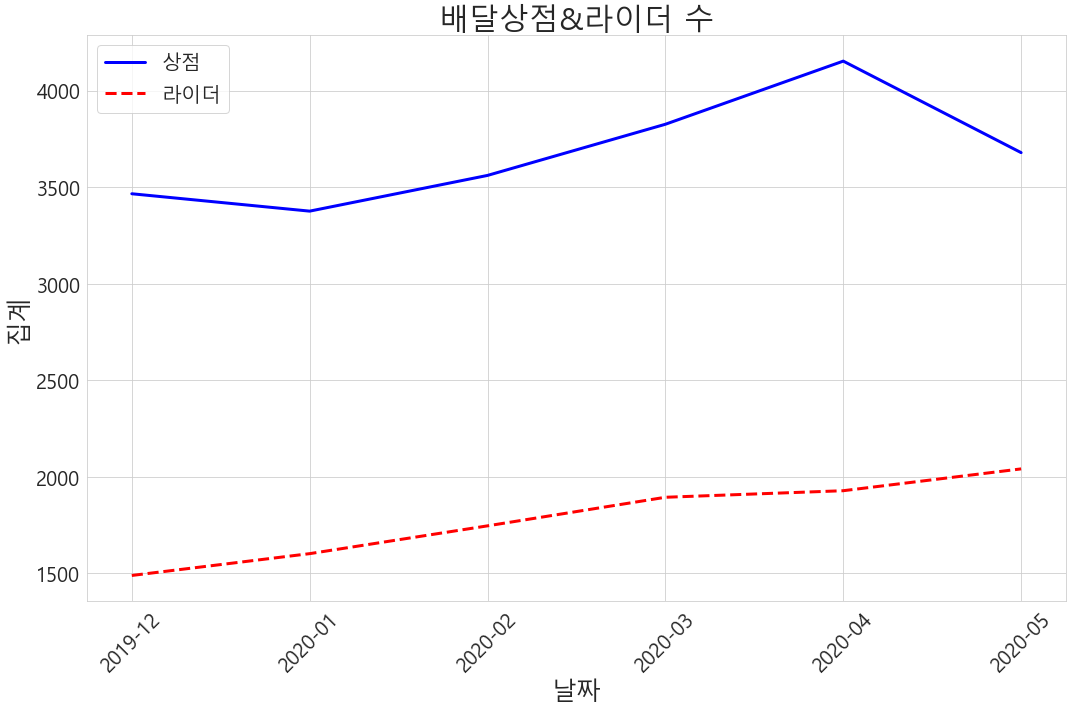

In [34]:
shop_list = []
for x in tqdm(date_list) :
    check = df[df['년월']==x]
    shop_list.append(check['배달상점ID'].nunique())


# 시각화용 자료 생성
visual_df = pd.DataFrame([date_list, shop_list, rider_list]).T
visual_df.columns = ['날짜', '배달상점 수', '라이더 수']

visual_df['배달상점 수'] = visual_df['배달상점 수'].astype(int)
visual_df['라이더 수'] = visual_df['라이더 수'].astype(int)

# 배달상점과 라이더 시간대별 파악
plt.figure(figsize=(15,10))
a = sns.lineplot(x='날짜', y='배달상점 수', data=visual_df, color='blue', linewidth=3)
sns.lineplot(x='날짜', y='라이더 수',data=visual_df, color='red', linewidth=3, linestyle='--')
plt.title('배달상점&라이더 수', fontsize=30)
plt.ylabel("집계", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=('상점', '라이더'), fontsize=20)
plt.tight_layout()
plt.show()

### 해당 데이터가 전국 배달데이터라는 모집단에 대한 대표성을 갖는 지에 대해서는 모르겠습니다만,       
### 우선 주어진 데이터로는 다음과 같은 그래프를 얻었습니다.
### 라이더는 증가하는 추세를 보이는군요.

**데이터탐색9**       
배달데이터 내 폐업상점과 이탈라이더의 수를 확인한다.      
이때 폐업과 이탈의 기준은 특정 아이디가 다음달에 존재하지 않을 경우이다.   

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 623.71it/s]


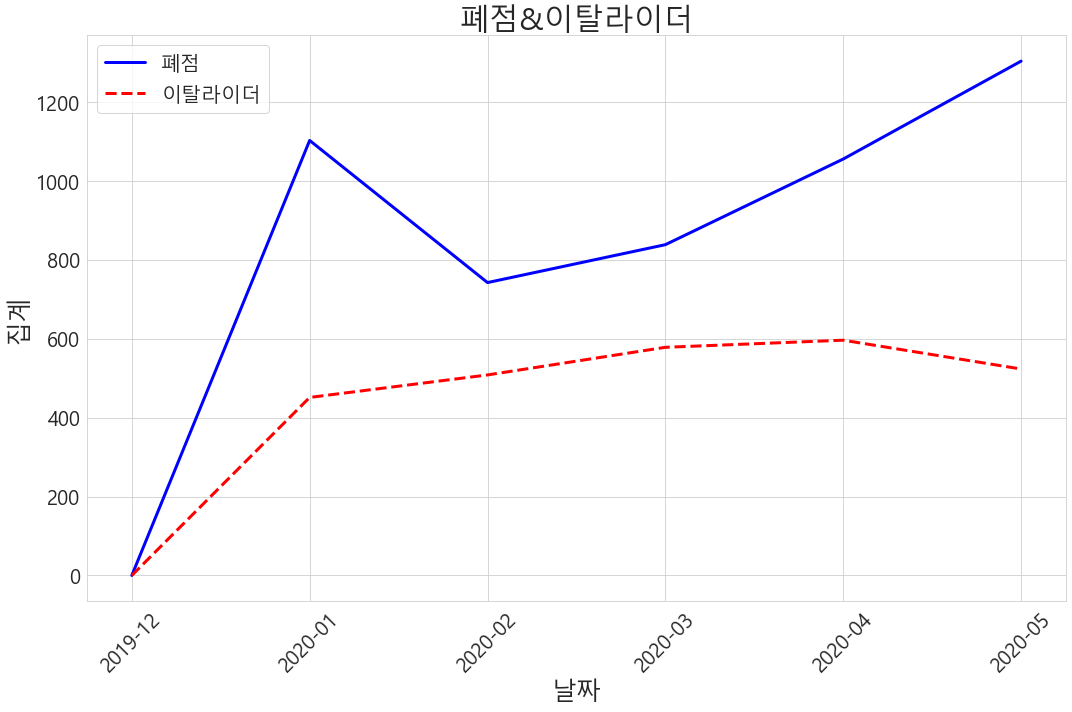

In [35]:
all_shop = []
all_rider = []

for x in tqdm(date_list) :
    check = df[df['년월']==x]
    all_shop.append(check['배달상점ID'].unique())
    all_rider.append(check['배달자ID'].unique())
    
close_shop = [0]
quit_rider = [0]

for zz in tqdm(range(len(date_list)-1)) :
    close_shop.append(len(set(all_shop[zz]) - set(all_shop[zz+1])))
    quit_rider.append(len(set(all_rider[zz]) - set(all_rider[zz+1])))
    
visual_df2 = pd.DataFrame([date_list, close_shop, quit_rider]).T
visual_df2.columns = ['날짜', '폐업상점 수', '이탈라이더']

visual_df2['폐업상점 수'] = visual_df2['폐업상점 수'].astype(int)
visual_df2['이탈라이더'] = visual_df2['이탈라이더'].astype(int)


# 배달상점과 라이더 시간대별 파악
plt.figure(figsize=(15,10))
a = sns.lineplot(x='날짜', y='폐업상점 수', data=visual_df2, color='blue', linewidth=3)
sns.lineplot(x='날짜', y='이탈라이더',data=visual_df2, color='red', linewidth=3, linestyle='--')
plt.title('폐점&이탈라이더', fontsize=30)
plt.ylabel("집계", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=('폐점', '이탈라이더'), fontsize=20)
plt.tight_layout()
plt.show()

### 그래프를 보니 폐점 또한 늘어나는 추세를 보입니다.           
### 라이더가 이탈하는 숫자는 균형이 형성되는 것 같네요.         

**데이터탐색10**          
폐점 데이터를 활용하여 코로나 전 후의 폐점률을 비교한다.          
모집단 크기에 따른 차이를 고려하여 비율로 계산한다.    

평균 폐점률 27.2
코로나 전 폐점률 : 27.0
코로나 후 폐점률 : 27.33


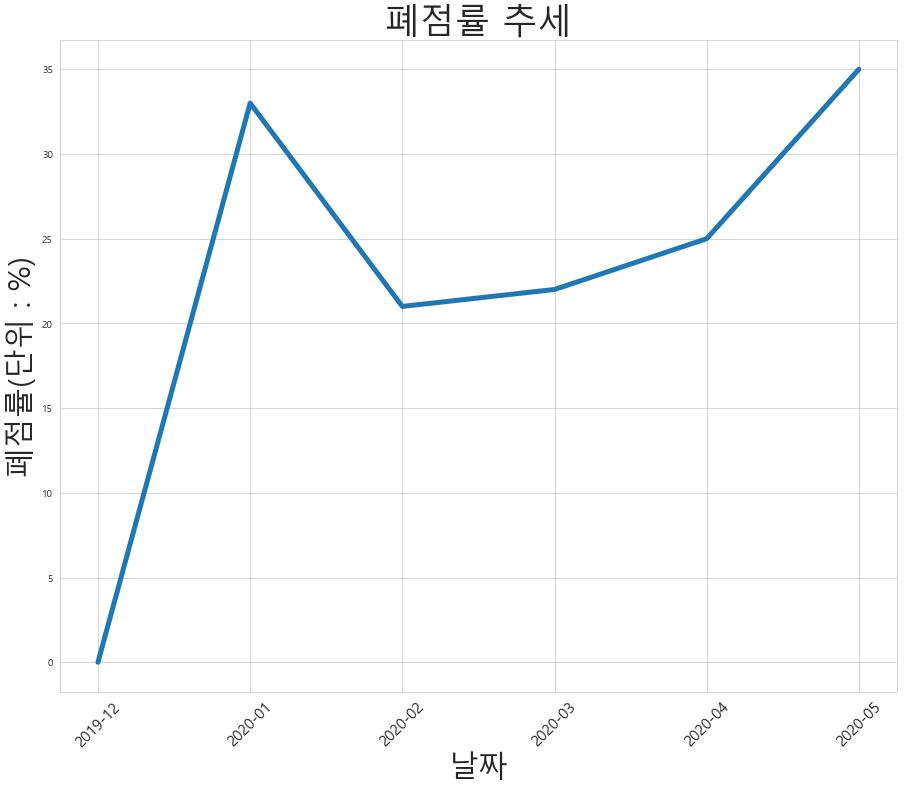

In [36]:
closed_rate = [0]
for x in range(1, len(date_list)) :
    closed_rate.append(round(close_shop[x]/shop_list[x],2)*100)

closed_dataframe = pd.DataFrame([date_list, closed_rate]).T
closed_dataframe.columns = ['날짜', '폐점률(단위 : %)']
closed_dataframe

print("평균 폐점률", round(sum(closed_rate[1:])/5,2))
print("코로나 전 폐점률 :",round(sum(closed_rate[1:3])/2,2))
print("코로나 후 폐점률 :",round(sum(closed_rate[3:])/3,2))


plt.figure(figsize=(15,12))
a = sns.lineplot(data= closed_dataframe,x= "날짜", y='폐점률(단위 : %)', linewidth=5)
a.axes.set_title("폐점률 추세", fontsize=35) 
a.set_xlabel("날짜", fontsize=30) 
a.set_ylabel("폐점률(단위 : %)", fontsize=30)
plt.xticks(rotation=45,fontsize=15)
plt.show()

### 위에서도 언급했지만 해당 배달데이터는 특정 배달업체를 기준으로 수집된 데이터이며, 
### 전체 데이터를 대표할 수 없다고 판단됩니다.    
### 하지만 폐점률이 높아지는 것은 코로나 이후 영향력이 있을 수도 있닥 판단됩니다.
### 그러므로 Dacon 측에서 제공한 창폐업 데이터를 활용하여 창폐업 현황을 알아보고자 했습니다.   
### 다만 창폐업 데이터는 창폐업 일자가 아닌 데이터 생성일자가 기준으로 하기에, 
### 시간에 상관없이 전체 데이터를 활용하여 창폐업을 확인할 생각입니다..    
      
### 이때 창폐업 지역 특성을 파악하기 위해 공시지가 데이터를 활용하여 지역별 폐업 현황에 대한 영향을 파악합니다.   

In [37]:
# # 실제 폐업 비교

# # 창폐업 데이터 불러오기
# region = pd.read_csv("./data/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region_ver2.csv")

# # 서울만 남기기
# seoul_region = region[region['BRTC_NM']=='서울']

# # 위경도 값 확인
# for x in tqdm(range(len(seoul_region))) :
#     seoul_region['LA_DCMLPOINT_VALUE'].iloc[x] = seoul_region['LA_DCMLPOINT_VALUE'].iloc[x][:-3]
#     seoul_region['LO_DCMLPOINT_VALUE'].iloc[x] = seoul_region['LO_DCMLPOINT_VALUE'].iloc[x][:-3]

# # 데이터 타입 변환
# seoul_region['LA_DCMLPOINT_VALUE'] = seoul_region['LA_DCMLPOINT_VALUE'].astype(float)
# seoul_region['LO_DCMLPOINT_VALUE'] = seoul_region['LO_DCMLPOINT_VALUE'].astype(float)

# # 폐업데이터만 남기기 ==> DIVISION == 0
# seoul_region = seoul_region[seoul_region['DIVISION']==0]


# # 창폐업 지역의 특성을 알아보기 위해 공시지가 데이터 사용
# jiga_2020 = pd.read_csv("./data/외부데이터/공시지가_2020년.csv", encoding='cp949')
# jiga1 = jiga_2020[['시도명','시군구명','공시지가(원/㎡)']]
# sigungu = jiga1.groupby("시군구명", as_index=False).mean()

# # 구단위 지도 그리기
# geo_path = './data/외부데이터/시군구.json' 
# geo_str = json.load(open(geo_path, encoding='utf-8')) 

# # # 지역별 구분 경계선 
# map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
#                  tiles='Stamen Terrain') # Stamen Toner / Stamen Terrain

# nm = '공시지가(원/㎡)'
# fmap=folium.Choropleth(geo_data = geo_str,
#                        data = sigungu,
#                        columns = ['시군구명',nm], 
#                        fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.9,
#                        key_on='feature.properties.name'
#                       ).add_to(map)                             


# # 지역 이름을 툴팁으로                                  
# fmap.geojson.add_child(
#     folium.features.GeoJsonTooltip(['name'],labels=False) # 해당 지역마다 툴팁으로 마우스오버 작동
# )


# # 인근 지역 마커 카운터(마커 클러스터)
# from folium.plugins import MarkerCluster
# marker_cluster = MarkerCluster().add_to(map)
# # 폐업 클러스터링
# for i in range(len(seoul_region)):
#     x = seoul_region.iloc[i][6]
#     y = seoul_region.iloc[i][7]
#     z = seoul_region.iloc[i][2]
#     folium.Marker(
#         location=[x,y],
#         popup=z,
#         icon=folium.Icon(color='red',icon='star'),
#       ).add_to(marker_cluster)

# display(map)      

창폐업 데이터를 활용한 폐업상점의 분포도를 확인해보면 공시지가가 확연히 높은두곳(강남구, 종로구&중구를 볼수있다)
두 곳중에 면적 대비 폐업수가 많은 종로구&중구를 탐색해보자

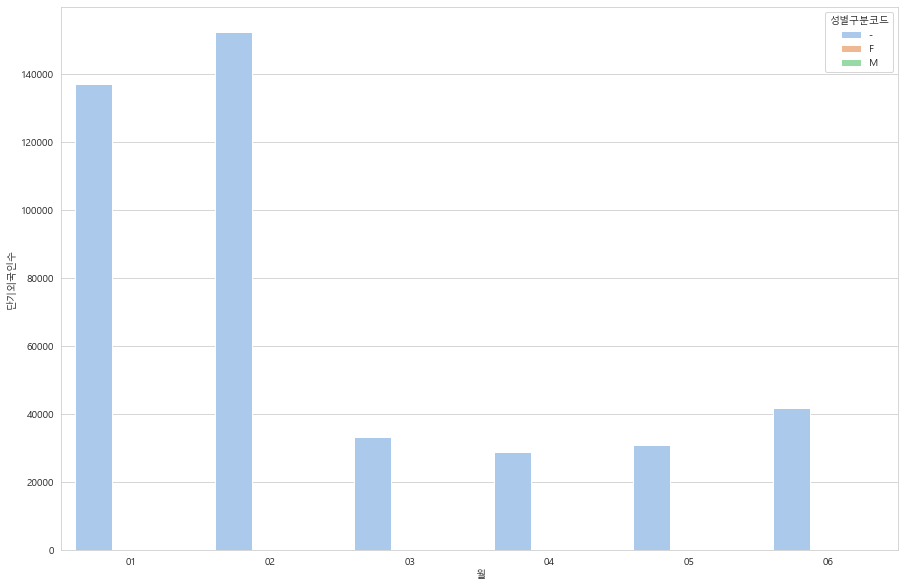

In [38]:
popl_df = pd.read_csv('./data/KT_빅데이터플랫폼_데이터셋/popl.csv')

popl_df.columns=['기준년월일','24시간대구분코드','성별구분코드','연령대구분코드','행정동코드','내국인수','장기외국인수','단기외국인수','noting']

#숫자를 문자로 먼저 바꾼다
popl_df['기준년월일'] = popl_df['기준년월일'].apply(lambda x: str(x))

popl_df['월'] = popl_df['기준년월일'].apply(lambda x: x[4:6])

# 문자를 datetime으로 바꾸면 형식 제대로 나옴
popl_df['기준년월일'] = pd.to_datetime(popl_df['기준년월일'])
# 월별 내국인수 합계
popl = popl_df.groupby(['월','성별구분코드','연령대구분코드','24시간대구분코드'])['단기외국인수'].sum()

popl = pd.DataFrame(popl)

popl= popl.reset_index()
#월별 내국인 유동인구는 유의미한 차이를 가질수없음(1월데이터가 없는정도)
plt.figure(figsize = (15,10))
sns.barplot(x = '월',y='단기외국인수',hue='성별구분코드',data=popl, ci=None, palette ='pastel')
plt.show()

생활인구데이터의 단기외국인 숫자 비율을 보면 2020년 2월에서 3월까지늬 낙폭이 매우 큼을 알 수있다.
단기외국인은 여행 및 비지니스를 목적이 많기 때문에 코로나 펜데믹 상황 및 나라간 이동금지 정책으로 확연히 준것을 알수있다.

### 배달데이터와 달리, 폐업이 압도적으로 많은 것을 확인할 수 있었습니다.       
### 특히 공시지가와 연계하여 보았을 때, 공시지가가 높은 곳 지역일수록 높은 폐업 수를 보이는 것 같습니다.      
### 아마 폐업요인 중 임대료가 큰 영향을 끼친 것으로 판단됩니다.   

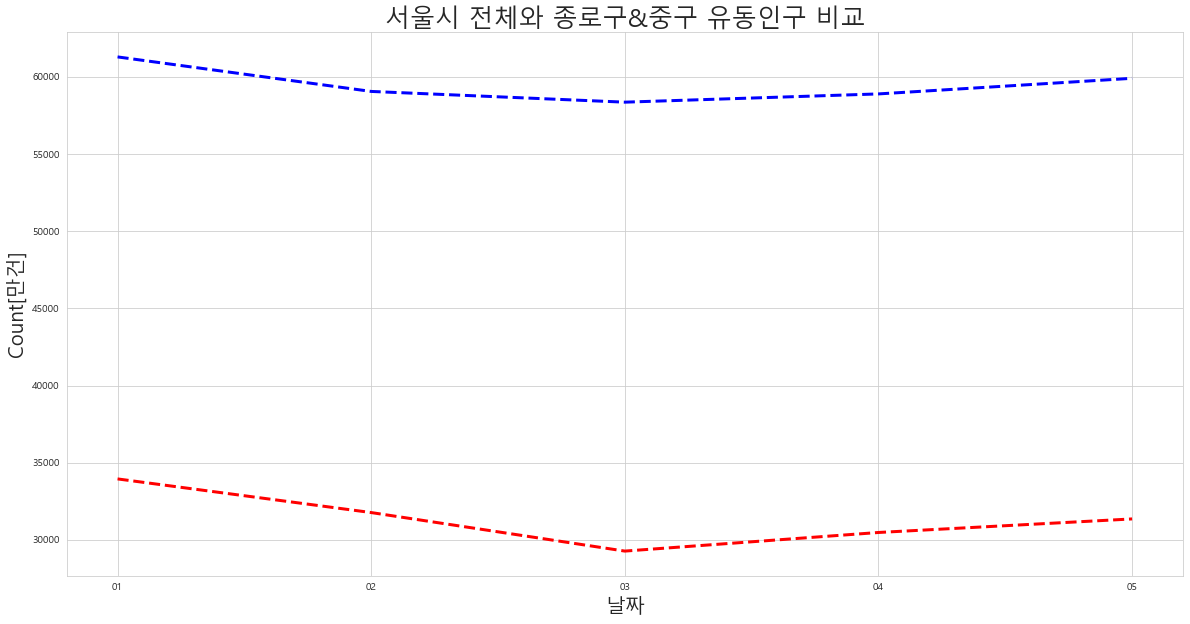

In [39]:
seoulfloating = pd.read_csv("./data/covid_19_dataset/SeoulFloating.csv")

# 서울시중 종로구& 종로구의 유동인구
floating =seoulfloating[(seoulfloating['city'] =='Jung-gu') | (seoulfloating['city'] =='Jongno-gu') ]
floating['date'] = pd.to_datetime(floating['date'])

group = floating.groupby(['date'])['fp_num'].agg(['sum'])
group_reset = group.sort_values(by=['date'])['sum'].reset_index()
groupeded = group_reset.groupby(group_reset['date'].dt.strftime("%m")).sum()
grouped_reset = groupeded.reset_index()


# 서울시 전체와 종로구 &중구 유동인구 비교
seoulfloating['date'] = pd.to_datetime(seoulfloating['date'])
group2 = seoulfloating.groupby(['date'])['fp_num'].agg(['sum'])
group_reset2 = group2.sort_values(by=['date'])['sum'].reset_index()
groupeded2 = group_reset2.groupby(group_reset['date'].dt.strftime("%m")).sum()
grouped_reset2 = groupeded2.reset_index()


fig,ax = plt.subplots(figsize = (20,10))
sns.lineplot(x='date',y=grouped_reset2['sum']/100000, data=grouped_reset2, color = 'blue', linewidth=3, linestyle='--')
sns.lineplot(x='date',y=grouped_reset['sum']/10000, data=grouped_reset, color ='red',linewidth=3, linestyle='--')

plt.title("서울시 전체와 종로구&중구 유동인구 비교", size = 25)
plt.ylabel('Count[만건]', fontsize = 20)
plt.xlabel('날짜', fontsize = 20)
plt.show()

서울시 전체 대비 종로구와 중구쪽 유동인구가 가파르게 내려 오는것을 볼수있다.

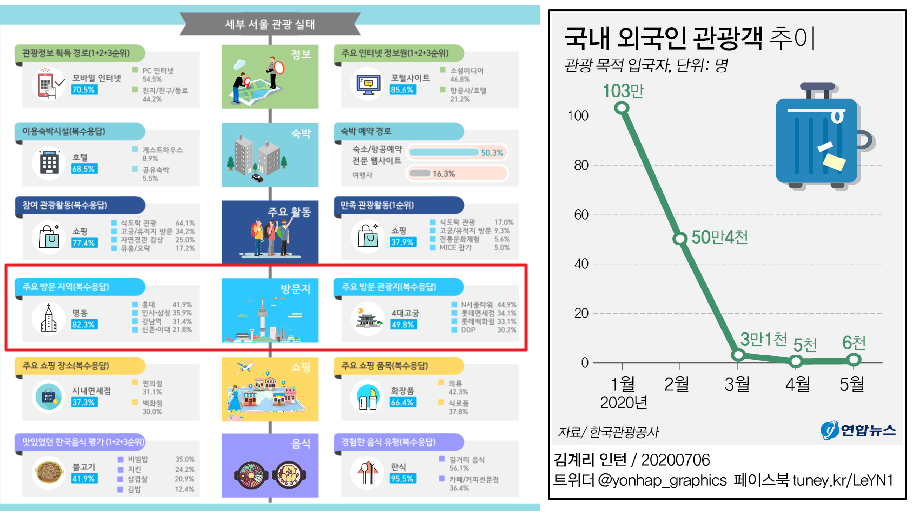

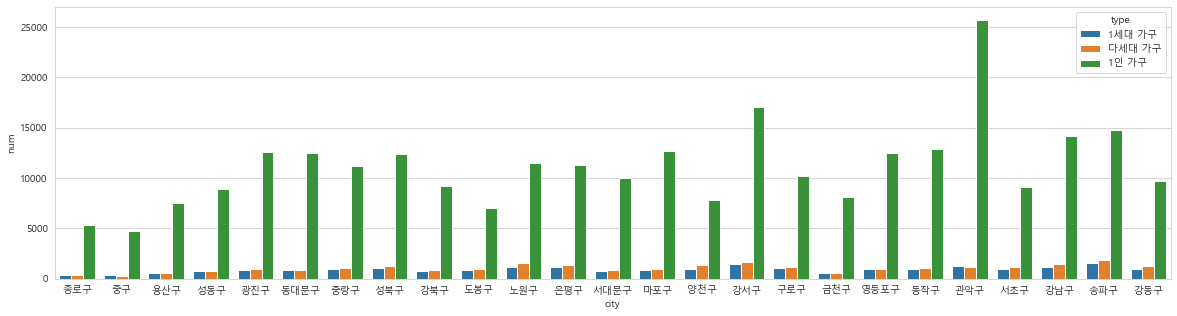

In [40]:
## 관악구 시각화 시각화 자료 -- 주문지역 주거 특성

household = pd.read_csv('./data/외부데이터/주문지역 주거 특성.csv',header=None)
household.columns = ['date','code','province','city','type','member','house_type','unit','num']
# 년 단위로 변화가 크지 않기 때문에 데이터 중 최신 1년만 봄
household = household[household['date']>=2019]
# 1인가구/1세대가구/다세대가구 비교
household['type'].replace(['2세대가구','2세대 가구','3세대 가구','4세대 이상 가구','비친족 가구'],'다세대 가구',inplace=True)
household = household[household['unit']=='가구'] # 가구수 비교를 위해 명수는 제외
household = household[household['province'].isin(['서울특별시'])]# 서울특별시 데이터 확인 
household['num'].replace('5가구 미만',4, inplace=True)# 통계치를 위해 문자 -> 숫자 변환(5가구 미만은 모두 4가구로 치환)
household['num'] = household['num'].astype(int)
# display(household.groupby(['city','type']).agg({'num': ['mean', 'min', 'max','sum']}))

plt.figure(figsize=(20, 5))
sns.barplot(x='city',y='num',hue='type',data=household, ci=None)

plt.show()

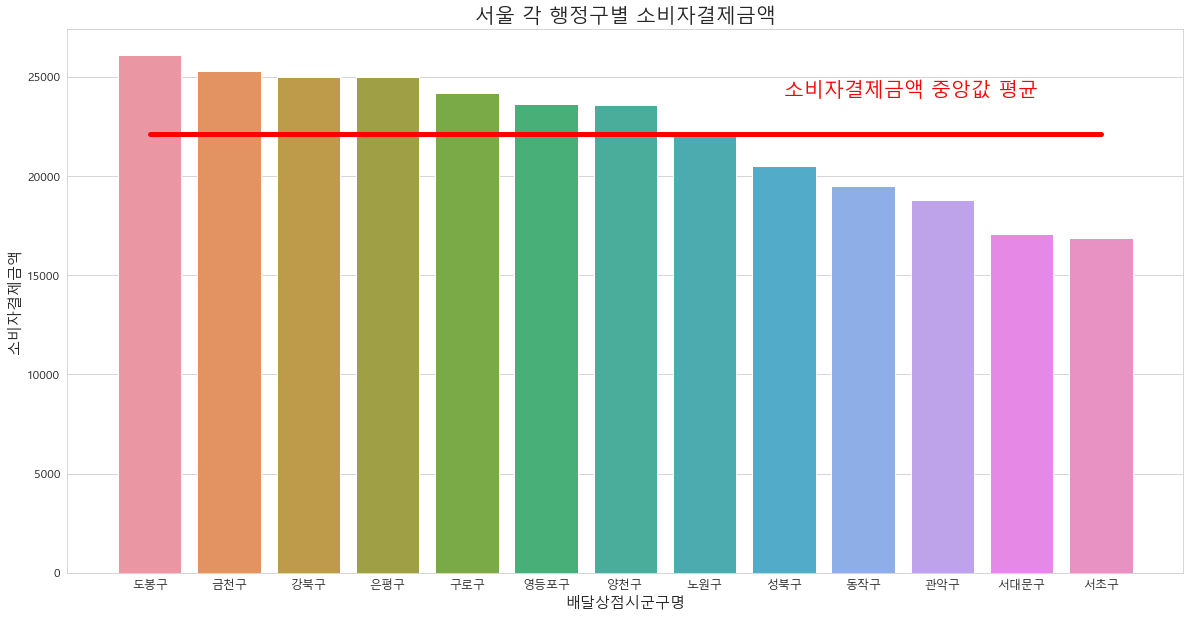

In [41]:
## 결제금액 시각화 자료 ---> 중위수로 시각화 했을 때, 순위 확인 후 데이터 활용 고려

# 서울 데이터 확인
# 데이터가 7개 밖에 없던 강서구 제외
df_seoul = seoul_df[-seoul_df['배달상점시군구명'].isin(['강서구'])] 
df_seoul['소비자결제금액'] = df_seoul['배달금액'] + df_seoul['상품금액']


## 평균으로 해도 동일한 시각화
# 각 지역별 소비자결제금액 중위수 -> 평균말고 중위수로 하는게 나을듯
## 전국 지역 평균선 추가
# 각 지역별 소비자결제금액 평균

customer_df = df_seoul.groupby('배달상점시군구명', as_index=False).소비자결제금액.median().sort_values(by='소비자결제금액',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))
sns.barplot(x='배달상점시군구명', y='소비자결제금액', data=customer_df)
sns.lineplot(x='배달상점시군구명', y=customer_df['소비자결제금액'].mean(), data=customer_df, color='red', linewidth=5)
plt.text(8,24000, "소비자결제금액 중앙값 평균", color='red',fontsize=20)
plt.title("서울 각 행정구별 소비자결제금액", fontsize=20)
plt.xlabel('배달상점시군구명',fontsize=15)
plt.ylabel('소비자결제금액',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**데이터탐색16**        
데이터를 서울로 한정하여 배달 관련 금액 평균값과 중앙값을 시각화한다. 

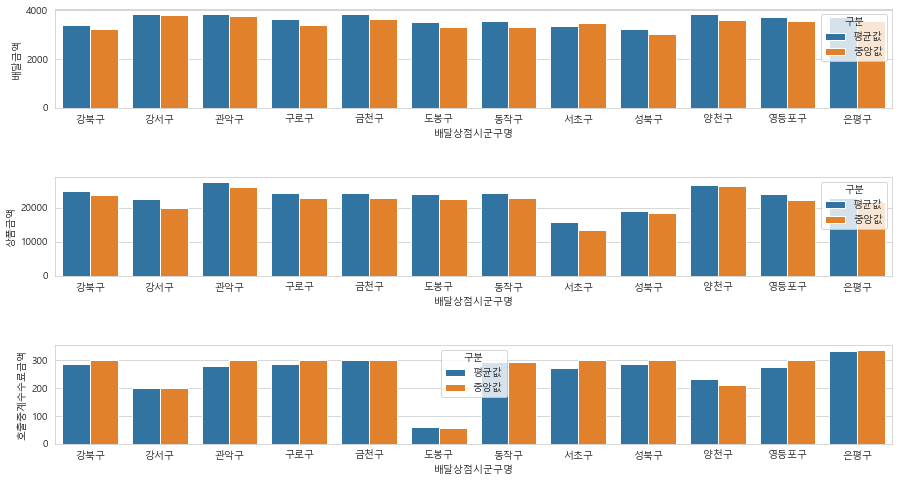

In [42]:
seoul_df = df[df['배달상점광역시도명']=='서울특별시']
seoul_df = seoul_df[['배달상점시군구명','배달상점 업종명', '배달금액', '호출중계수수료금액', '상품금액', '배달시간계산']]

seoul_mean = seoul_df.groupby(['배달상점시군구명','배달상점 업종명'], as_index=False).mean()
seoul_median = seoul_df.groupby(['배달상점시군구명','배달상점 업종명'], as_index=False).median()

seoul_mean['구분'] = '평균값'
seoul_median['구분'] = '중앙값'

new_df2 = pd.concat([seoul_mean, seoul_median], axis=0)

## 배달비 평균 & 중앙
fig, ax = plt.subplots(nrows=3, figsize=(15,8))
plt.subplots_adjust(wspace=1, hspace=0.7)
sns.barplot(x='배달상점시군구명', y='배달금액',hue='구분', ci=None, data=new_df2, ax=ax[0])
sns.barplot(x='배달상점시군구명', y='상품금액',hue='구분',ci=None,data=new_df2, ax=ax[1])
sns.barplot(x='배달상점시군구명', y='호출중계수수료금액',hue='구분',ci=None,data=new_df2, ax=ax[2])
plt.show()

In [43]:
# 전체 데이터 수 확인
seoul_df['배달상점시군구명'].value_counts()

구로구     305522
금천구     147855
영등포구    136253
도봉구      81495
은평구      58767
동작구      30217
양천구       7735
강북구       5312
관악구       4854
서초구       2308
성북구       1573
강서구          7
Name: 배달상점시군구명, dtype: int64

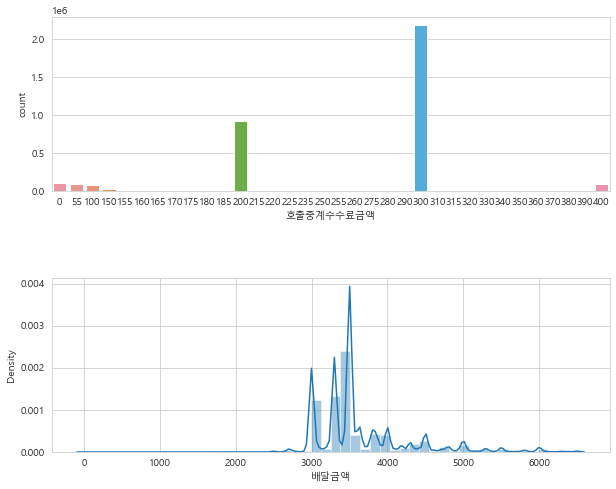

In [44]:
### 일반적으로 배달금액과 호출중계수수료 금액은 어떤 분포를 보일까
fig, ax = plt.subplots(nrows=2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=0.5)
sns.distplot(df['배달금액'], bins=50, ax=ax[1])
sns.countplot(x='호출중계수수료금액',data=df, ax=ax[0])
plt.show()

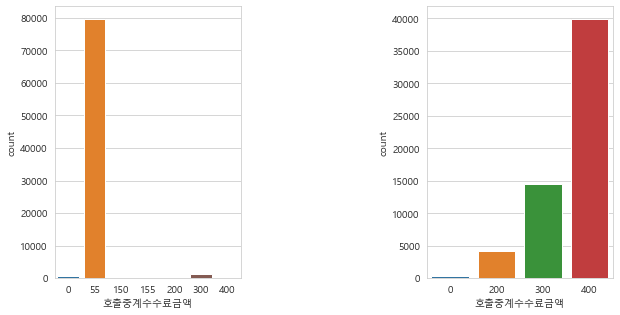

In [45]:
# 배달수수료 중심 시각화
dobong = df[df['배달상점시군구명'] == '도봉구']
enpyeong = df[df['배달상점시군구명'] == '은평구']

## 호출중계수수료 시각화
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.countplot(x='호출중계수수료금액',data=dobong, ax=ax[0])
sns.countplot(x='호출중계수수료금액',data=enpyeong, ax=ax[1])
plt.show()

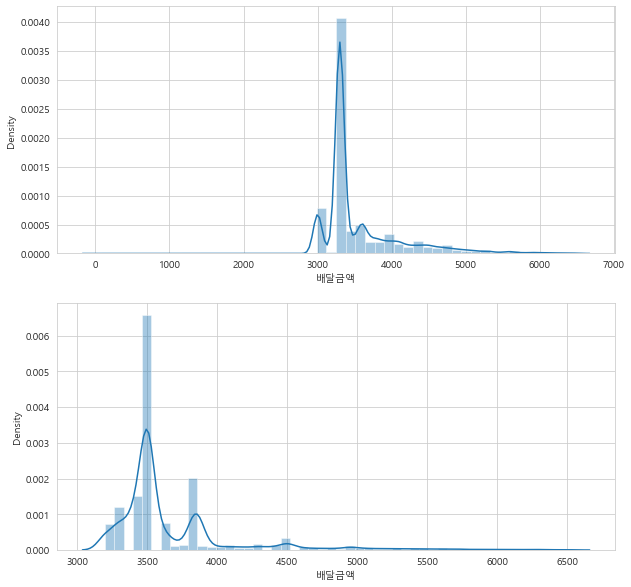

In [46]:
## 배달금액 시각화
fig, ax = plt.subplots(nrows=2, figsize=(10,10))
plt.subplots_adjust(wspace=1, hspace=0.2)
sns.distplot(dobong['배달금액'],bins=50, ax=ax[0])
sns.distplot(enpyeong['배달금액'], bins=50, ax=ax[1])
plt.show()

## 3. 분석을 통해 나온 인사이트 정리

### 분석인사이트

1) 코로나로 인하여 외국인 숫자가 감소한곳은 직접적으로 타격이 크다 이는 가게들이 결국 폐업 수순을 밟게 된다.            
2) 그만큼 오프라인 위주였던 산업들은 임대료가 높았기 때문에 이를 감당할수 없거나 완충해줄수 있는 방법이 없다.(배송을 해외로 하지 않는이상)            
3) 앞으로 나아가야할 방향은..            

 - 우리는 코로나로 인해서 비대면, 배달문화가 확산 되었다고 보지만 이는 언제든 도래했을 수순이였다.
 - 우리가 기존에 가지고 있던 배달 문화 + 1인가구가 많아지는점 
 - 단지 코로나로 인해서 좀더 가속화 되고 급격하게 성장함
 
4) 기존 음식점들과 새로 창업하는 가게들도 이제는 시스템과 방향을 새로이 해야 함           
- 또 다른 전염병을 대비해서가 아닌 고령화 사회 + 1인가구 비율 성장에 대비        
 
5) 앞으로는 임대료 및 권리금 기존의 상권분석에서 벗어나 데이터를 활용한 또는 컨설팅을 새로하여 창업 해야함

## 참고문헌
      
[1] 김익성. "포스트코로나시대 골목상권 소상공인의 자력 활성화 방안." 한국유통학회 학술대회 발표논문집 . (2020): 9-11.            
[2] 이영주, 김기진. 2021. Post-코로나의 식사행동 변화에 관한 탐색적 연구: 음식점 방문행동, 가정식사행동, 배달음식구매행동을 중심으로. 한국조리학회지 27: 133-142.        
[3] 구선본, 정유경. (2020). 음식 배달 서비스의 문제점과 실태조사 연구. 한국관광학회 국제학술발표대회집, 87(0), 539-542.              
[4] 소상공인 연합회. (2020). 소상공인 사업현황 실태조사 보고서        
[5] 소상공인 연합회. (2020). 코로나19 관련 소상공인 영향실태조사        
